# SVM 스터디 자료

[참고자료](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### Motivating Support Vector Machines

C:\Users\tldus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


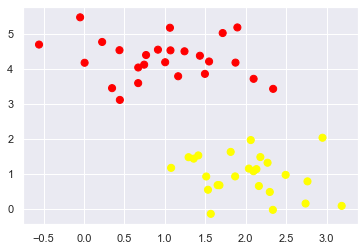

In [2]:
from sklearn.datasets.samples_generator import make_blobs

#선형적으로 분리가 가능한 데이터 생성
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

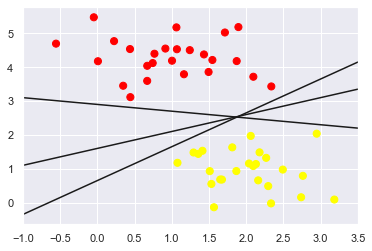

In [3]:
#데이터를 완벽히 구분할 수 있는 결정경계
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### Support Vector Machines: Maximizing the Margin

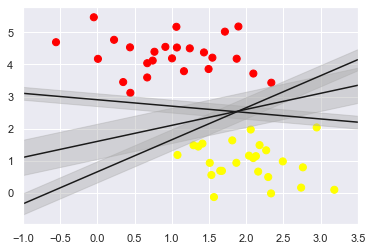

In [4]:
#결정경계를 기반으로 margin 시각화
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Fitting a support vector machine

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)  #선형 SVM, 하이퍼파라매터 C = 매우 큰수로 설정
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

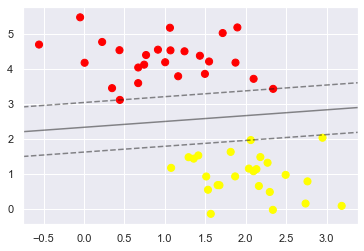

In [7]:
#최대 margin을 갖는 결정경계 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [8]:
#서포트 벡터들은 자동으로 모델의 support_vectors_으로 저장됨
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

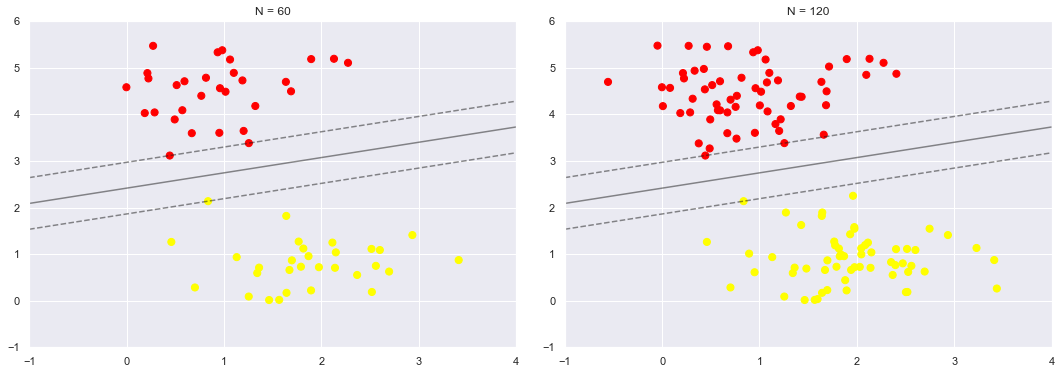

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Beyond linear boundaries: Kernel SVM

#### 특성 추가를 통해 데이터 분리

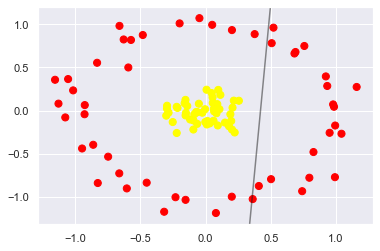

In [11]:
from sklearn.datasets.samples_generator import make_circles

#선형적으로 분리가 불가능한 데이터 생성
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [12]:
#특성 추가
r = np.exp(-(X ** 2).sum(1))

In [13]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

![입체적으로 잘 안보여서 첨부합니다](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzsnXeYHNWZ7t9K3dPTM92j0Yw00ozCjEYBZRQQQSDJZARY%0AGJuwOOzFZlmujb279rXXOO067LLe5dqXy66xMfa1wTYYMLAEAwJEEgKTlHMchRlppJEmd3eFc/84%0AXV3V3dW5qru6+/yehwdNh6pT1VXnre87X+AIIQQMBoPBYDDSwpd6AAwGg8FglANMMBkMBoPByAIm%0AmAwGg8FgZAETTAaDwWAwsoAJJoPBYDAYWcAEk8FgMBiMLBDTvdnbO1iscTAYDAaD4Qqam+stX2cW%0AJoPBYDAYWcAEk8FgMBiMLGCCyWAwGAxGFjDBZDAYDAYjC5hgMhgMBoORBUwwGQwGg8HIAiaYDAaD%0AwWBkARNMBoPBYDCygAkmg8FgMBhZwASTwWAwGIwsYILJYDAYDEYWMMFkMBgMBiMLmGAyGAwGg5EF%0ATDAZDAaDwcgCJpgMBoPBYGQBE0wGg8FgMLKACSaDwWAwGFnABJPBYDAYjCxggsmoWjRNg6ZppR4G%0Ag8EoE5hgMqoOKpQKCJEhCIAgADwPACoABYSQEo+QwWC4EbHUA2AwioWmaSBEBiEKAA4cJ4DjOHAc%0AwHGAokSgaSq8Xj8AwKybhMT/zWAwqg8mmIyKh7pdNRCighAVAAHApf2OLqJmdMFkQspgVCdMMBkV%0AS7xQEnAch/RCqb9nLai6gDIhZTCqEyaYjIrDSii5RJWzESakDEZ1wASTUTEUWygzka2QMhFlMMoD%0AJpiMsscuodS/QkiyyNlJOiHVNAJNkwFw4HmJCSmD4SKYYDLKFrdZlIXCcTS9RZYj4HkBgiAxty6D%0A4SKYYDLKjkoTynSw9VEGwz0wwWSUDc4LpTlK1t3kIqSsmBGDYQ9MMBmux1mhzJyTWU5YCSnPJ1uf%0AzBplMHKHCSbDtdDKPJFosQEeHMfbIJSVI465wAoxMBiFwwST4TryqczDyJ1Mbl1ZDoHjeAiChwkp%0AgwEmmAwXQQiJiWR8ZR42UxcTjqO/haYp4DgekuQBwCxSBoMJJqPkWAllpUa9lhvm34EVYmBUO0ww%0AGSUjN6G02y2bekZn7b1yI52QMmuUUUkwwWQUHbdYlIRoUFUZhAjgedYa1m5YoBGj0mCCySgabhHK%0A6GgAqFBVFaoqx71DRZSA5+2KzGXosEIMjHKGCSbDcdwilNTVqppe4SAIEjiORuZqmgIA0DQVmhb/%0AOV08DRFlQmon6evrKlBVBTwvgeMEJqKMksEEk+EY7hPKxJlWAM+LEATqjlWUCBQlAlH0gOO4aB6o%0AFhVTFdQiNb6tC6dZTAEWsGQnNGKXPswIgghBoK+z9VFGKWCCybAd9wqlnqaiIZ2w0dxDY3LWt6Vp%0AKggxRNT4d/L3eV5IsEiZiNoJWx9llAImmAzboCKigBCqIPYIZe7ft7YoBdO2ci+uynEcBCH+dqEP%0ABsQknIagqmriPphb12nY+ijDaZhgMgpGtyhpH0cVALWuSjEOKoZmsaJCqQtTYspI/N+5FV83Hgji%0Aj1UX0XgrNDu3LhPQZApN82GF6hl2wQSTkTeJrlfTO07sLe04MgllMaFCKoDnhbjXc3HrapoKWQ6X%0AUEzNbmx3YPfxs0L1jFxhgsnImVRrlMVO+HdKKJ06jGzdunqEbmK6Cz3PZotUYFWRHCDd+qiqqtA0%0ABTwvsojdKoQJJiNr3BXMkyiUPGhHk/TjocKe6j2bBpgDiW5dQgjC4eFoDVdvkluXFqNn0brFxjiV%0AGjRNBs/zEARDMJlFWh0wwWRkpBKEstzgOA48b+XWTV4bTeXW1SN1y3+N1H3qk+jOZYFG1QETTEZK%0A3CKU0dEAUEx/FyqU5Tlz0ZQXqyAjPdDIvEZKrdH475vdukJMRBPPoz6xu0tf3TCY7NZ2WaH6yoQJ%0AJiOJ/IXS3gnNsCgBY6Jy0qLMLUrWLZjduuY1UutoXb3HaHxJwMR0F3eIE6WSBIUVqi9vmGAyYrjF%0AorR2vQKAWKYuxdJgFa1Lzy2Jq2KUOneUBrkApYzWNXDDT68HtjkRscvcuu6HCSbDAaHM747WJ/PE%0Aeq/0tXJdf3MXelPu1G5dNZozqgcYkQzRuqnduvZRnQqRjVtXr3/McSIT0iLABLOKcZdFmSiUPIyC%0AAErSdxj2Eu/WpXmgkcgoeF6AKHpMFqm+RprZrUvF1M7riT0wAfFCKssREKKhpqaOFWIoAkwwqxCa%0AQB+JTnpcydxs6YQyuTIPe3wuBbrw5e/W5RJEtJyjdQH3FXQwGquzQgzOwwSzioi3KBXQm634l0A2%0AQlncsTByIVu3bjbRuubUl3IowuC26GFCMo+FrY/aBxPMKsDK9WqsDRZ3HNZrlHa77vIjVb1ZRnYk%0AunV1EqN1zW7d+L6j1m5dd/0ebrQwc6/bzPJH84MJZgVT7DXKVFV0DKHUED/huEMoGc5iR7QuQPuV%0Ask4vBk48SLBC9elhglmB5CaUxhqIjSMwjUVPD2FCyTBI79bVkixSgNbWjS8JqAtxvIhW27VVjOPN%0Adn2U/mZApZZmZIJZQbgl6pWOxc1CWXx3NCM7dBEEhJhbNxweASEaPB5fLN3FsEiVFA28k9Ne7MCp%0APMxyJXF9VFHC0DQVHo8/7nOVYo0ywawA3CSUBropQNe0StEfk1EpUJEyonUl+mqe0bqV49Z123qq%0A+YHCENJKEUuACWZZ4yahpDdKYjAPE0qGXSRf17m5dbNr4F1OnV7cFrFrphzOXz4wwSxD7BFKO11U%0AtCJM3NY5ey6tdO24CiU5aKI8a8k6gZsiU3MdipVbl24nvkB9uk4v5p6j8bmjTqz554v7LEx3nR/7%0AYYJZRjhjURZSxs4slHpPRzXldwrDPRN4MXCLYLnFUrBjGKmida0sUsOta64yZax9q6pccreuW64R%0AM3ReqlyvEhPMMsCdrlfzzSpAd2PRYB/33ciMcsY5qyWxgXdsjyncujqyHDZto7RuXbc81LhRwO2G%0ACaaLMUrYKdDXA90qlFafd8uNnCulvO/L9Zw5T3HPSyq3big0BICDKEoFuHXtwo0u2cq+hplgupB4%0AizJ5fbDYY0lutZVaKMsNOtnpVnupR8NwM+aUElH0xL2ebJGqKd26dkXrui/ox50CbidMMF1E6hJ2%0ATpB+u5UulBQVmqYgHI7ETVpmEWUwEkm8LnJ169oXresugXKfgNsPE0wXkN0apVNWZvx2K10ojTJ9%0AgL42pq+9GuW/NITDw0i2BgSX5LhWD+W8LpYuWteop5uNW1dIsEjdev1ZC3gZ/4RJMMEsIe4L5kkU%0AytJ0EHGCVMfH8yI8Hk90EtMgy6PQhTKdNeBUJRmGNe44v/ZYdBzHQRDip95kt64hqIlFGPROL+bW%0Ad27wiFRDFSQmmCXATUJJbzYV9gmlE2Xn8t+mtVDqGMfIcVzUDQbwPA+Pxxf7vlXeXvpKMoaIVvLk%0AUW04aSllcuvGW6F6A28KjdgNlzxatxpggllE3CaUBvrkX2kWpXXPTatCC6lIbQ2kW5uSTd93OlKS%0AUWyK+fNZ5Y4CdNlAlkPQNC3WAi2VW9fcc9TJazCVhclcsoycMISSXtC5CaW9F3bxXK/2585l43bK%0Apjk1IYbFms/NnHptKl5AUyXAl0fzZLcElLhptnXLOUG0OAAPQIMkeWMu2sRqRpkaeNvrEXHP+XEK%0AJpgOUphQJm2t4LGkck3Syb/8KXWHFI7js25Xlbp5smD6XunXpdwDOw/JxAtUfANvY2q3duvqKWvJ%0AHhE73bqVZF0CTDAdwSyU+kVd2mCeVK5JxfI75YZ1mb78hdLOyEwra9S6y4Y5bw8ACMLh4SRrtNrW%0Apdw04ZZrUEuuDbzzdeuW6/nJBSaYNmIllKUcS2bXZAkGZiOp6tlmX8sysWB8MUuZpe6yEYmMRj/H%0ARyew1NZoeaQbFE4FH1reFCJQ6a/B/Ny6dN4DKtkbwATTBmgkpQxC1Bwma+fGkkkoy53ChdKdGNYo%0AFUSvtzZLazT++3a409zzMOWagVQFdrh1ZTlkeoij3pVKgQlmARjrUyoIiURftXfSNtpbpZ84rIWy%0AuGt4xj6dgpjWKXUKLarg7gk5kzUavy6qgRDF1ihJ9zxjuWEg7gpqofd88bwimdy6iiJDv0f1hzmO%0AEyAIvqKMsRgwwcwDs1DG30TFD9QoTCidyJl0An2M5mOsnOpD+ZBdqyoVqd1pLGcvV9xX+q20QWGJ%0AD3OqqoAQAq/Xb1qecs3JsgUmmDlgLZSlGwsdQ+FRoc6IfOHnx4jsNVNZ7mU7yS75XU1Tis0ovqCv%0Aj5VzaTr7cZeFSXHTWIxSk/p1qGlI8niUM0wws8BNQknHU9r0CaextpoBeozlvU5ZCuKtUQlA9sEd%0AihKBqipJ1mixfgcm2Na4MSKVEDdZ387ABDMN7hFK3d1bjULJR18r1vkvFzd1YWQK7lCUCDRNhVGY%0APrU1WmibqmzHy3A7BHbHcLgNJpgW5CeUTk60iWt4lREVaibdw0DpH1iqB7M1qmkqRNEbV3rNXFc3%0AuzZVlfZA5xbxdpd72F3nxjmYYJqwx6K0L3LNSJ/QsVsoS29NVbrVXAlkTjVILk6f3hplbdIKxX0B%0ASNUBE0y4yfVqjMe6QHg5CEl243NrLiXHuSkH0d2kj9RVkU3T5Mxt0tiPYY07LUy3jMcpqlow3S+U%0AesSj05WDnMjnsh6vO4Sysm/qUhJvjRqvp2qanKlNmruqx1SHKOQHc8lWLM4IZf4XirVFaeQZGsEw%0AxUtUthvr4u/VnUtZTRTaJk1RItAraZWqabeb3KDlsmZYad6aqhLM4liU2W+3GkSk/I6Rg3Wz6dKh%0AKAq2bfsLRFHCpEkzQYiGYLCh1MMqmGzapNFkeOphUVXF4vvFbNrNLMxUlIuAF0pVCKYRnBACrY4h%0AlXw85SUi+UCiDyZ29N10bgJ0WxutEyd68PDDP8TQ0GsIBIYgisPo6JDh9xP093N4/XUefr8AVaWt%0AxGpqFIyO+qEoq/H5z9/nmuMohMQ2aYoSgSh6Yi7axLq61dm0223ibT0eZmGWGXv27MaHH/4Fn/zk%0Ap2KvOTNBZt6e+4TSiX2a7xD9ON1dnccNCdfd3Yfx2GMfx4IFe/GlLwHvvw/09gKBAODx0DHOnUvQ%0A3KyhoUFBIADMmUO/Gw6Hcfr0Q/iXf/k9li+fhUhkEebM+V+YOHFqSY/JToxeoZXctDt73OQeBtw3%0AHqeonES+FIRCo9i8eVMR95j8SKVHDdIbWBcRAYCY5dOv01ehPWXsqOssseiAGEsjKJwKe1yNIssy%0Annzyctx55140NAAffADs2QNMngysWQOsXg1cfjnw1lvAZZcBJ05QsVRVIBKt+T9mDHDVVSpCoR34%0A5Cefxa5dt6K//3TeYyoXFxu1RkWIogceTw283lp4vX54PD6IoheCIMXySDVNhaJEIMshRCIjCIeH%0AEQ6PQJbDUBQ5GpSU+hpz1zlxv4VZadYlUAUWZn19AIODAyXZt7VFWYi15c4rMDmXkqK3qmLE09t7%0AFBs3/gKCsAXDwwRdXY1oajqCV14BLrgA2LiRCuHAAHDoEDB1KiBJQGcn0N8PjB0LyDLA89T6BOjk%0AtGgRcN99GhSFQJY347e/XYLGRj8ikbNwySX/jEmTZpX0uItF9g2Tc2uT5ibcVjLQXQ8TzlHxghkM%0ABtHfrwtmcRL17RdKd5Kq6IDZFcaIp6fnEHbv/mtcc81W8LwMjiM4dYrgl78EbrwRePZZ4OMfB668%0Akn7+3XeBgweBlSupRenzUSHlOMS5JjkOGBqignrffYNYvFjFuHG9GBjoBc8fxJtvroXP9xWsWfPd%0AsroG7RIGO9qk6SiK7Jq10VLvv9qoeMG0tjCdTM8giBeMShRKq1xKw+3qsoffvHAqEGjbtp9h9eqt%0A4LgweJ5aiYEA8MlPAr/7HfA//2f855ctA9aupULI84CiADt3GoJq5i9/AaZNA6ZMUSHLwMyZQFub%0A/q6Crq6f4tlngRUr/h6BQMD2Y3MSJ2vUZm+N0gtbUcIW3y92mzR3uWSrxcKs+DVMURShqoldL+wl%0AdRsqu9bvnLoIc28DRogC+kCgP3QI4DixbG8UI6G+ODc8z38AIAyvFxBFKoKiCMyaRd2wHEf/M1s3%0Aq1YB69cDl14K3H03/fwjj9C1TAAYGQGeegqYPZs+rKxcCYRCZrGktLSoCAbvxe7dK/Hqq7fj6NF9%0Ajh5ruaIHCMWvjfpj7+tro3obNE1TYmuj4TBdG41ERiHLYahq5rXRfHBfkA1bw6xA7L26rF2vABVK%0ApyNQi4f7onvtgh6ToihQFMQmQADQNNWWwuHvv/8ytm+/C+PHH4Gm8Th2jIqlGZ6n7tbE5zo9elcQ%0AqGW5YQNw0010XbOpCdi9m0bTShINBvL5qJD29ADt7clj4Thg2TIZR46cwcUXv4mnnz6MxsYn4PP5%0ACjrGaoLjeIiikZaWqWl3+sL0hVS4cqeFWelUiWDaW58ydRsqKijlJyLpythVllBaeQN4XoxNeDqy%0AHIr+i7Osd5rN8W/a9Bb6+m7Bl78cir12110EzzwDBIPA8uVUDEUReOEFoLHRPCbEmu++/Tbw3nv0%0A83Pm0H8PD1PLc9w4+nlNA375S2BoiMOOHQSCAEyfTt8TBGN7PT08mpqo+/GKKw7g5Zf/gOXLb835%0APDIodjbtLkabNKcp13FnS5UIpj1PQKmFkk8oYVfeFB60ZHdwVeE3ofVvR13KtIUV/f0ikVEQokEQ%0ApLSl2swCmhgAMjBwBh999BjWr/8PfPnLowA4KArB448D118PLFxIA3R0N+roKN3mzp21+MMfFNxw%0AQyTmmu3pAZ55hqaYfPQRsHbtStx00ztYvDiE118H3nnHWNv0eoFx4yZj06ZDaG+nQsxx1HINh+nf%0Ae/Z4cP31hoU0OLjLVYUbknGHJZWryz6fpt25tElzn0VXvmU7c6EqBNPv92NkZBi1tbV5fT+TUFp9%0A3r0TUGpyPc5ywTqal97g5uPSrQVCAFH0mIKYkqvLWKcj8Pjggz/C5/svrF59Gpdcchx79gAffUSg%0AaTT61eejAlZfD1x3HfDrXwMXXQQEAl4Q8r/R13cKP/jB9zB9uoKREeDUKeDv/g6YOJFaMD/4wSiW%0ALImAEA4rV8ZPmk8/DezcqeJHPwJOn6bu2QsvpGuZPT3Aq68Cl1zSgNOnVaxb149AIIzx43+Hdet2%0AIBj8ayxe/AlnfoACcJ0uFICdbdLcJpjlOuflSlUIZiAQwMDAIGpr9YX77C62dFZJMS8OfRJ3jlRF%0ABwoTSvtvotxOQqpoXkqm1BfjiTmxVJu+7USX2+HDe9HU9BMsWTIS/RSPhQs1TJxII131pUJ9TZLn%0AaXTsz3/ehpkz70QgMBbz538Dt9wSP7aHHwZuuolAFDmI4lgcP85j/HgtusZpnJPTp8ejvX0EHEfd%0AuzfdRK3SLVuAhgagro7D+PECHn30JG66KQxVFcDzHDhuI7ZvvwsvvTSIhQuvxLhx4+AWy06nkufi%0A9G3SrJt264TDw0nu3GI37a6W1l5AFUTJAkAgEMTAQH/Wn4+vWqNfnBxoME8pI0LtVc3440g8znLo%0AvWlNfGWlbKJ5zec1e5cbzwsQRQmSRCvMHD78DJYuHTV9ygNVpeuMeoEBgK4l8rwHHFeD+novpky5%0ADRdd9Lc4fvwhzJs3kDSGa64BXnuN4MMP6/Cxj/0j1q5dFBuD/mAzOsrhwIFGNDX1xawSjqPFDK68%0AkqanbN1ah1deGcGqVREoCq1Hq6ojiEQGMWPGcSjK1zE8fCXWrfsCursPZHUenMctllRxRYFeX9QS%0AlSQvPB4famr8sSpGxud46EXqjUjdYYRCiZG6muNWabnOF7lQFYIZDAZx5syZjJ9LFkp9ss1WKMvn%0AgtGTsw3c8EBQGKlLEAopohHtnUBEcRiA4Xrz+YIYHRURDgN9ffQzuphRSwHYscOHiROXRi2F/Zbb%0ADQaBvXu9OHDgq5g5cyHmzv0/eOihc3DsmABZ1nDffR78+td1WLBgBw4cMNJS9PmREOD112tw9dXr%0AsGfPNRg71geOI/B6ZfC8DElSIUkqGhoiWLBAxcc//j727v1HyLJsOZ7SUOo1zOgoSnxr6A9q9N+8%0AqRRgLSTJKAUI0GtMVWXIcjihFGAIihKxMd2FWZgVBS1eMJj2M4UJZdLW8hpnMTByKeNbnFWmUGZb%0Aq9dqm7mPg+fnYmjIWHTiOA6S5IcgAEeP0uhWvViBKKoIhRS8++4lmDlzMdau/Rf09+8GYn1PAX0C%0AGh0FeP7LWLnyThCiYerUObj66hexffuj+Ld/W4QvfCGEL35xENdfD9xwA/Doo/FieegQ0NX1ebS3%0Az8CkSedheDgCUdRi7/PRWSAS0aBp9IuXXrofGzf+d+4noWJxjygkipxhjUpJ1qgk1UQ7vYhJ1mgk%0AMmphjSo5W6NueZgoBlWxhhkMNqC/v9+0FmhcDKnKu5WreKTCej2PR/y6ZXnhRJBSIT/7Oed8Ck8/%0A/SRuvnkjeF4PGIpg3ToOX/yihCNHCJ58UoXHo0FVOWzb1onPf/5+bNjwEC6//H7s3Kng4EFaO5ZC%0AH9yeemomLrvsjqRUl9raeqxZswPmNMpJk4CPfQz48Y+BefNogNGYMYCm7QUALFhwDR5//Cv4whfi%0Ax047oxCEw0Pw+epRW8tDVY/mfzIYjpPpGi+0aXf2bdKsHyZcFpdkC1UhmIFAAH19vXGvpRKQ/BOJ%0AnYZGduYaSJMpl5JaZnbjfM3e5Aed0kfzSpKEFSsexJ/+9B/w+d4DxynYu7cP119/COPH8xg/Hli8%0A2AjskOUF8Hg8CIefxbhxKsaN4/DnPxNs2QKccw6NdH3ppSk477yfob6+ISn448CBV/DpT48mjWP8%0AeGDuXODqq+nfhHCYMOF1/PznN2P27F2orZVx//202EFzMy1+MDwMXHUVMDqqW7UaBKG15FaD26JB%0Ay51smnZn0ybNnFalaeWaf547VSGYwWAQBw8mlgHTLwI7hdI9F0z2RQecFzc7yVTHttTU1wdw6aXf%0Aj/2tab9Dff3fJX1ucJBAFJcDACSpL/b6lVdyCIUINm6ka5ctLddh+vTFAJCUiuD1jsPICGCVLaUo%0A+ufoRNbZGcLMmX/GNdeI0DQOHEfw4ovAb37D4frrCVat4jA8LKGmhkaSv/RSO5Yuvbbg82EXpf59%0A3VQr1Ymo1HSR4Nk07QYAVVUQn/pS+nNlN241p2wlEGjA6OgInnnmSSiKOdAlXUBIIZROgKzX8/S6%0AtqktMGee5O3sNKFvz/46tvGHbt5X4Zx//k147LHVGBgwtjc4SPDoo1fgggtuAQCEQlPjvlNTw+Hc%0Aczk0NfGoq5tvuV2O47B8+afx7LMzkt4Lh/XgIi52bXd1ARMnclHXG01JueIKYMECgv5+Ho89JuHw%0A4QC2bBHx1FNL0NFxNyRJSto2ww3o4u3sXvQAI/PaKA0yqo1bG9XvGUI0KEo4tjZaid6Bircwjxw5%0AjD/+8Xd455238fzzz2H27Nno6OiAM0JZOiq36IBVYfvyKc8nCAKuu+5BrFv3MBTlLQAEgnAB1qz5%0ADESR3n5TptyGv/xlPc45x1g2IITg6aeX4xOfuC7ltmtqatDScjcef/wbWL16D3w+YNs2CW+/reBz%0AnwOMiYzgzTc5/NVfceA4JTbR6pG0J04QHDlyE9rabkN9fQMuumgiVFVxyF3PsI/iX/9WbdIUJQJF%0AiUAUPQC4mFVaDvdnrnAkzWNAb2/6yFK388tf3o+HHvo1VFXFmDFj8LWvfR0XXHBe9F37o0KNSFse%0AdjdPppOXhsRxFyqUNGKWJG3XnrHm/1DiZGF7um3qPuI4EaIoxSYAPW/N4/HFJZI7zaZNL6K7+2eo%0Ar9+GUMiHwcFzsWrV3QgGGzN+d3R0FG+//Tto2mlMnHghurpeRDD4OM4+uwtHjtThnXdm4cILN2P+%0AfAU8Hy+CTz7J4brrPHj88bOxfPmfkradXJ6tuA9g4fAICNFQU1NXtH1aoadniKI3rvh6acaiQJZD%0AEEVPVKRKiy6YklQTWzYgJLmZQDnR3Fxv+XpFW5ibN2/E5MlTcMstn8ODD/4Cy5dfZJrMnah9WIyJ%0AhI7bEEp3Bb4USuUVts+OBQsux4IFl0OWZchyCILAx7WUSofP58PFFxthr3PmnIuhoa9i+/YPMW7c%0AJHz601Px7LPXYv78twAA+/YBW7fSz+7eDYTDBKIow+v1x9apFCUCvQJUcglALk5Ane0B6Y4apdWU%0AOpErblrfdZqKFsx7770/9u+f/ez/FnHPxY4QdVfgS76ki3w1dxKpJD766CUcP/4IPJ5eRCKT0dFx%0AKyZPnlXwduvq6rB48UWxvxcvvhc///mtaGj4AJ2dwLXXUhG45BKCP/5RRiQyLa5Em6Yp0DQVHg+N%0AKDJ33KDRumqs+IJOcjH6wh/e3LMM5p48THeNBXDfeJyjaIt427ZtxZ133p70+ltvvYHbbvss7rjj%0AVjzzzFPFGk4ZY1dxBR0nLvLctplcTMHZ8nyJ2yxVcMIbb/wCLS3/Azff/Diuv/513HzzQ1CUm7B5%0A81rb9zVxYjuuuupP8HprsHgxtZR4HvD7gb/6KwJVtT4HVknxXq8/IfCD/k7xlWVGEyrL5N9Iucyf%0AA23Hbdau1Xjc86BjL0WxMH//+9/ixRefh88XH/+uKAruu+8nePDBh+D11uCOO27F8uUrMGbMGAdG%0AwSX8v3xIDnxxIme0+K6v5HXK0ufCGh1KnL3jw+EwNO3nmD07Pk7ggguO4/e/vx/Apbbv8733/oDr%0ArlMBCLHcOZoGIKC5eVfW27EK/ADMBenju25Y5/IJyK6Rsjtcsu7CbRad28bjHEWZmVpbJ+Ff/uU/%0Akl4/dOgg2tomwe+vgyiKmD9/ITZt+rAYQ4ITbtP49IfCiU8R0eFRPhG+1uch95qvTlG6x+CNG1/D%0AhRfusXxv0qQtOHXqlO37JESOluYTwPNS9D8xKmCFR2gYBek9sYL0erFwc51TQgg0zVwsfCRDsfDS%0AT8TVtE5kDMhbAAAgAElEQVSXK5WYPpKKosxOK1asgiAkRxwODw/B7zei32pr/RgaGnJkDB6PhHA4%0A7Mi27cZaUIwbtVxvWqO4fW45opWIx1OLkRHr2y8UkhzJgZw79zq8805Din0usH1/QKpcPsOlm6lY%0AOKDn9+Xv0q003CrebhuPE5TUTPH76zAyMhz7e2RkGPX11uG8hRIIBDE4mNw6yU2kKzpQzjUm4oVS%0At2R0ocx2ndK9v1s+LFhwAdavX2j5Xnf3EgQCAdv3OWHCZBw69DkcOxZfMejppzsxd+4/2L6/VOhR%0AtlatqxKLheuYE+LD4RFEIrTjBs0XLYaIusfadRvV0jwaKHKUbOKFPWXKVBw5chiDg4OoqanBxo0f%0A4eabP+vIvmkT6QGMHdukj8aR/eRTai6bXErnJgVnL3S7a75Wys3J8zxaW7+DZ5/9Cq66qgs8Tyv0%0A/OlPczBz5l2O7feKK76LDRvmYP365yCKgxgdnY4lS76IceNaHdtntiQWCyeERK1MDqLoiVsfpf+O%0A+7Zlvqh9ucW2bMYm3CbeBOX8QJ8LRRVM/eJdu/YFhEIhXHPNGtx55z/gH/7hiyAEuOaaj6OpqSnD%0AVvIjEAiivz/7JtKFks3EnlvRAadvDidmhMRApfJPfbGTefMuxqlT6/DIIz+HJPVC09px4YW3wWL1%0AwlbOO+96ANen/YybXJ88z8cVC6Aei+QAo9QdNxLTXfK/Bt1w+bopStZN10kxqOhKP2buueffsHDh%0AAqxYsRLmKi92k03lnHyq8yRWp7FvvPZWJ3KqC4zdFYkIoZMqx0kQBBGiSI9dUWQoSjgWpFIKQqFh%0AcByyLlzgBG6osKNbmDwvwOPxZfH55CLhVtOb0W0j++pFkcgoNE2F1+sv+UOfm8aS6jfSNCR4AMqL%0Aqqz0YyYQoE2krXpiFpPKLTqQqpRd+R8bozxI13FDF1Bz6yrzhF7c6kWF4S6rzm3uYWepGsEMBhsw%0AMFAMl6z1Gqbb21LlS/pSdu6ccMoBV82JZYy5ehFAPQaGSzf76kV63qqb1tDdMI5UEbuVev1WjWAG%0AAkH09vYUcY/mmq9ublSdf/BNKrcypYz9MajcG768cMZ6MYKB+Nh6sX49xwuosS6qE4mMlLwgPSvm%0AUDqqRjCDQXPQD7UCnX1a1FNEMjVwzg7DlVx6MrmV3eUySg8hKhRFgapyUSuERF8vn2OoVIr5E2Sq%0AXhSJhAAQ0MbIqQrSx1cvcsrDQpuC277ZvGAWZoVSPJesfqXYI5Spt283mbdbWrdy7uk6qYgXQ8PV%0AZp4EVTUCTVOiE6BgS4RltnBc5U44+VBKcdCFkP4mHLze2piIxgcZqSBESZPqwsdyjgu/htyUxsHW%0AMCsSmofpXNSvEfRinunKv90W4M6ar/liRAXr8OB5CZIkmirK0Ghk6zqopXbHMUqB2arTRRQQLF26%0A1qkuxrbMAlrMBzEnqKbC60AVCWYwGDRZmHZbK4lreXQfdjeRLjbWka+ZrWU3uY91kq1jivmpn+ME%0ACAKtc0qbSkuWEZaZ3XHlH8zlDtxkvaS36swu3cTiC4nF6LMrSG99DbmvLJ6bfiPnqRrB9PvrLOrU%0A5r94njroBdAjRO3HPqFPRz55oim2ZOu4jG1mP4ZU1rHuDUi3Vpk6wlKLsyDo30rGNIXysshZYIkd%0AJFYvAhJTXVJfQ1bVi9yG+wTcWapGMHmetyWQI5OYFKPRsZ3BSmZr0D6hLD2ZrON8f6dU7rjkyjNW%0AaQrxE6Cbc/0YzhH/IEbJpXoRAGgaXT4od5duuVE1gmkH2RUdKNcLtzLyREsh+vFpCmLcOFKvaRkT%0AYLwVKkS/W17n3QncEqlcDCvK6hqi+46vXkSvH3ptKUrY9P343qLFWhawasHmkp/NEapMMBObSGf3%0Ay+YXHVoeV038pKRP1OUnlIDV71Q66zj1mlZy+TarwBCAQJbDJguieq2Iaj1uILl6kaapiERGox4K%0A0QXVi5hLtmLheQ6apmUdpu7+ogP5k8plWY7H5kS6i1PWTarybfFWKA0GUVW5YqMrGYXBcXpB+nTV%0Ai8wPZAbJxejZdZQtVSWY9fW0nmwgkL7nZr7Roc5TeNBP6pqvsFksnQ9QckL0S2WNmq3QcHgYhBB4%0APL4UEbrOp7m4KTm+9LgnEjSVezif6kXWD2O5XUcs6KeCqa+nPTFTNee1QyiLk1KR+xpX+lJ2yekW%0A7sO8RmJ1LG54oLETLup2S47QTZwAWZqLs7ipnVYuZKpelJjuYn0dZXLpVtd6e1UJZjAYiOZitkVf%0AMZdBSxTKQte/3CFA2TWnNj5r98Rq/zYTC0SUZxRvPqSPrkwsJF4JaS5usezcMg7rIJtcSX0dWVUv%0AShfpbU/mQTlRVYIZCDQkNJG2qvdaORNwZXVISSw5aOexlO9Nn8oVZ21FpE9z0d1wbrk+qmwuzhLd%0ABWrvVjNVL9KvpVTVi8LhEVP5PwHuKd1nL1UmmNQlGz9B6hNwOQhldmOrJKGspOCkYpEpzcV68otP%0Ac6EPk3qQXGlFtAwv2yJQjJrGqV26+vWjqpHoa8b6uiB4K/b+rMyjSkF9fQBHjx7Gs88+bXIl8ABE%0A6CXS7MHprh3W29VdczQoRP+MAI4Ty04s44/FLJacTTdjeZ2PQtFdsoIgQhQ98Hh8qKnxw+v1Q5Jq%0AIIoe8Dy9TgwrlCASGUE4PIxweASyHI7W2lWryhXnpsAWN4xFD1KjUbr0Acvr9cPj8UEUvXGu3kqj%0AaizMzZs34oUXnsWhQwdRU1ODyy+/HJIkodzrvQJujurNndKUHDSTW45uuWNVuq2vuxvdL78Az7Fu%0AkJoayJ2dmLpyBQQhMSjE6TQX96wdMpIxi7d5XTQ+n7iyqHjB1DQN3//+d/Dyyy8CAKZPn4FvfvNb%0AkCSpxCMrHPuq2jiRApL7NtMVHihGyUEGcLqnB6O//TUWhEPgwEFQVCgffoSNJ/tw1qc/nRRgZJXm%0Aogtp5XRzcZNws7GUkooXTEIIdu7cjoULF2HVqkuwceMHmDatE4RQt6UzTaSLkYOY3Kaq8DXY0oSI%0Al3bN1a2WZGnG1fvG65ivqCYJBESeR+fBAzh+4CAmdnYiU5qLdcWZ8k1zcZP32U0pLtXkltepeMEU%0ABAGPPPIkAGD//n14441Xi7h3uwVI35aW8JqbJ6DU58AtAT3m+14/jVU4FwAApJ5jlq83iCKO7N0L%0AdHbGXiskzUWP0E2X5uK2Cdkdt5j7rLrEucdlP5utFE0wCSG45567sXfvHng8HnzjG99Ga2tb7P2X%0AXvozHnnkdxAEAatXX4M1az5p+xiCwYZolGz5YVhhOm4XytTkV3ig/I4zf4rTxs0KTfICSGyDB2iE%0AAD5vxu/nkuZCIy1Tp7m4IcCF4j6RcgfVVXgdKGKU7BtvvIZIJIL77/8Vbr/9S7jvvp/Evf+f//l/%0AcO+99+NnP3sQjzzyO4velYUTCNDSeJTyuPitI19RlpGvgNmVrE+UepRyJax1lT/aWWchYhG1sZ8D%0AWpcuy2ubHEeFUBBESJIXHo8PXm8tvN5aU4QuVVdNoykushyK1dSV5TBkOQxVlaNWa4XPymlwz0OE%0Au8ZSLIpmYW7evBHLlp0PAJgzZy527twR935n5wwMDg7E3B5O/AaSJEGW5YRXnVi3s6OWZ6rqQ05E%0AiharDZAd65ROT5bJUbKEEMiyHI2qruzJYdpFK7Clpxtt27agSfJAIwR7AXDXfBy+2lrb9pMpx48G%0AFMkxy1RVNYvap4lFxJ35bapRGBjWFE0wR0aGUVdXF/tbEARomhatTwi0t3fg85//DHw+H1asWAW/%0Avy7VpsqI3Cf39DVfAaui6e4msZpSeXV82f/Ga+A2b4ZvaBCjdfUg8+ahY8WqUg/LMXiex+wbb8aR%0AfYtwbM9eiHUBTFqyFDU+X1H2b05zIYRAVWVIUk0sP9Tcyiq59mk1dHNxT+3WanyQKJpg1tb6MTIy%0AHPvbLJb79u3Fhg1v4fHHn4HP58M///O38dprr2DlyosdGAmX8H/3kE3kK71Gi1sQoTDKITfU+rj3%0AvfIypn3wPmoEAZA8QDiM0LvvYm9ERuellxV5jMWlua0N4ydPgcdTHKG0Rp+QjTSV2DtxEbrVk+bi%0Ari4ybA3TMebPX4ANG9YDALZu3YJp04xoO7+/Dl5vDTweDziOw5gxjaa1RvtJbppcWujNr8AQSw72%0AVx8qDvpEluxKLq91SkVR4Nm0iYqliRpBQM3mTRaufUYxoeuiAkRRgiTVRNdEjWozgiCB4/ioqCpQ%0AlAgikdFo1aJhRCIhKEoEqqpksSbqpqAfN1mY9P9lckvbQtEszIsuWoX33nsXd9xxKwDgm9/8Htau%0AfQGhUAjXXLMG1157He644/PweDxobW3DlVde7cg4fD4fRkdH4fPVOLJ9SvXVfAWsjgegFmX5VVPq%0AP3MGTSPDgIUrsikUwplTp9Dc0lKCkVUPuU7Idqe56N4QtwiD+4Kd3PQgURyKJpgcx+FrX/tm3GuT%0AJ0+J/XvNmuuxZs31jo8jGAxiYGDAYcHUSV3z1Q35h3ZhLfwcilPKrnD0SdX8oFLr92NQEjHG4vOD%0AggB/ip6qjOyIRCI42d2NuoYGBIJBx/ZjR5qLFlVWPb6g1A+0pd6/jvsE3HkqvnBBInoT6fHjx0df%0AKd6Pbk/NV5qjZ2+Fovy2k0743V/KzigCQYiKcFiOrXcBgNfrRU97JyZ1HUxYQyY43TENzTZGjFYT%0AhBDsev551H74HlpGQxjgeWxv78CUG26Ev74+8dPR/9srEFbdXOjY4qsWGd1cKJHIKAAkROcKRezm%0A4k6Lzi0CXgzK06QpgGAwiP7+M0Xdp7GuZ+684cZ1veweHjIdjxPYf45I3P/N61366y2XX4wPmpvQ%0AHR6Fqio4HolgU8sETPn4GpvHUj3sXfcqZr77NmZqBEGvF5MkCYsOd+Hgw78t9dBSdnPRr2m9pJ+R%0AKxouajcXt7iGdegxumQwRaLqLMxAIOh4tR/zuoczNV9LhxHQk1wgvRywch9znAiv1xt7ENAtiZoa%0AHzpvvAGnT57E5iNH0NDaiqnNzQBUyHKowtMXHOLDD1Cb0B2F4zi0Hz2C7gMHMKG9vUQDs8b8u+oR%0Aw2Z3bnHTXNxmYZKyXUbKlyoUTOqSNYuac5jzKSstoCfT8Th1nPn9aNbuY8DsDje6ztPJzuutBSEE%0A4yf60NzSGrfmZZW+UPk5gIVBCIE4MAAIyUFgYyUPDh896jrBtCJ1cFH1pLlU4/olUIWCGQw24MyZ%0APtMr9v7wztd8LW6d0WShybXwQGlvrNR1a/XjSk/mybF6RNScO50PHMdBaWgALFLGemUZDVMmx71W%0ATonx8deJM91c3Hg+3DSWYlB1ghkIBNHVdcD27aa2YJyyKp1dP6iEptTp3MeFBCVVvojGu/569+9H%0AZPNGSH2noUoS5ClTMPH8CyCKuU8f/DnLMPjSi6gX4s/dwUmTMXfS5DTfLCX53Wt2p7m4y6qzdg+7%0AaogOUJWCaaxhFm6tpRaW8mk7brinSdrSfO6b2K2xJ781t+vCThF108R48uBB1L7xGlpFCfB4AADa%0AwYPYOziAqauvyXl7HRcsx95IGMK776JpYACDkoT+GTPQef2n7B66bdhZXaewNBeKqqrgOCX2sFWK%0A+9JtAUjFouoEs6EhucVXPikamYSFWjDumfiyxyw05SiUuee3JudhZn+8Q/39GDxyBJzXg+b2Dggm%0Ay6kQEQWQU2BRJBzGqa1bIPSeADgO6vgJaJ47Ny8r0Exoy2ZMFKW413ieR8vx4zjd04MxORZv4DgO%0A0z92CdQVq3DmzBk01taitUh1avOHwMmEguzTXNTo6ypk2Zh3SpPm4rYApOJQdYJJW3wVFiVb7pGi%0AiSSXCiyvAKX8+msmbiO3p2VCCI5ueBvBQ4cw2SNB1TR0b/wInvMuwJjW1pTfy0ZEVZWW3VNVBdm4%0Ac2VZxqmXX8JkU5QmOXQQh04cx4RLLi1o3VE8c8byxAQ8Xpzs7s5ZMHUEQcDYsWMzfKr60hbM0DQX%0A47dTlAgUJRIt+8eZAoxou7xidnNJtZ7qIueII1ShYAbR35+fYLqjlJ3dF7371yk1TcPutS9B2LIR%0AQigEZcJENHzsEoxr77D4Tex5eMl04/ds3462w12QPNT6EngebQCOrn8Tyic+mbVlRwhB744d4LoO%0AgY9EoNbVQZsyCQ2tE+Hx+BCJRDAyNAjJ64EkiZbu3N5tWzEpHAYRjN+O4zi0DQ+jZ/8+jO+cntex%0Acxyg+XxAKJT0mYiiQKivhI5C6XGTe1yH54UESzTZnet8mkvyeXHhqbKdqhNMWkt2JPqXvoaZ/kk2%0AP6F0Opo1/21bW2QUu/Kq7Ezb2fa7h7Fk2xZ4eB4AAfbvx/79D6D7r/8aLZ0d+h6R6TeRZRnHt2yG%0AcPIUNI+ImpnT0dgy0WLsmW9+7tBBSBaiOIHjcGT3LkyYPcfye4NnTmO0uwecJGLM1Hb0btqIiceO%0AQRQEQBSBUAinN36EU3IEQkhGzZEjCGgahkFwevx4NC1aHHP56xMkd/IkCFGhKEYKE89z4MBDO34c%0AZFpn3hOj1jEN8pbNkBJSQY7U1GBix7S8tpktburM4YYHyFRWnV1pLukidJPHYuy7mqg6wczlB7bH%0AAnOXWymVO1l/ILC35B5Q6EPDyWPHMGXrFnhEwbhLCUEHNLy/7hW0dHbg6PZdIHv3gFcUKONbMOGc%0AZfBEA1R0RoeH0ffM05gWkWlgDTScObAP3YuWYOKCs3MeFx8JW7/O80A4kvQ6IQQ97/8FDd09aPV4%0AoGkajm3eBOX0GYgTJsR9tk6UcODVV7Fg6jQIUVH2ASB9p3H4/fcx4bzz47Yr+Pzgh0cBkGjdUwJN%0Ao9euAhXh8HDe1kXr2Wfj0NAg6vftxXjJg1FZxjG/H8GPXVyQq5fhLOnSXMxBRfmnubA1zCoi/Y9c%0ALq7KXMhkJbvVnXJq+zYsEfUn5/hydp6jx7D/pZfRuXs3fFFhIcePY8ee3Wi56a/imh6f2PA2Jhw6%0AiMGhYRBBgGd8CxrqazHy4YcIzZgFSYoX2EwoDY3Aqd6k10ciMryxOsUGvXt2YeKJXohRIed5HnWD%0AQ1AOd0Fubo6zVjVNg//IEXBTO+K2wXEc6k6cQGh0NHZsHMdBnDIVSu9JeEUJgmB4EPrDYfjap0Ev%0A+5dPigvHcZh80QqMLFqM/UcOw+P3o61tUpHuA2eDbbIfA+AGYTDcw/mNxSjMIVhE6GaX5qILqKbl%0An5ZVzpT6aiwxiQvW5VDzNfdoXkJU0GMyB/SILjme9Aj1dYgoaoKi04jCU7KC1p07Y2IJ0ElhdiiE%0A4xs2xF4LjYwg9OfnMPboUTQN9KP5dB/ErVswcOwYJogCTu3dk7DXzO70ujlz0JuwRkQIQXfTWDRO%0ATHbz8se6qdvVhOTzoQFA3/Hjca9HVAUeWLvH6wUBI2fiayE3TZ6C7smTMRDt0clxHE4rCgZnz0XT%0AxLa0vSJVVYGihE29IkegKOHY8eiTdG1dHdpmnYVxkyaXxXVjF+56kNRdsvZtkfYV5SEIEiTJC4/H%0AB6/XD6+3FpJUA0GQYq5eo4ZuKFZzWVEikOVwtK9o5YtoVVqYkiRClmWIJsvF/shX/XtO3XHpt1sJ%0AVjIhBJPPPhvbX3geC8NmFygHlWgYrQ+i0WNtGYrHjsT+feq99zBOUeOO2y8IkA8fhto8DsjjRg80%0AN6N/xUp0bd0C4dQpEEmC2taK1kVLrL9g0XDaHwjgdE0NOCX+PYkXMNTcbPk7DWoaahsakl5vXbIU%0Ag52dOHzoEMDzqJ/ajhZT949cUlx0kdC0wty5lYS7DtfZwdDfloMgpE5zURQZ+rypqjSym+MECILb%0AU4QKoyoFU2/x1diodzs0T5jllVJhRbkXfDcHJUmSgJobbsCmR/6IOeFRiDyPXlXG7s4ZaO2cAezc%0Abr0N07FKPccgNwSBBMssyHHY0t2Nlukz8xpncPx4BC3cr1ZowSDQ15f8Rsc0nARBUFHgFUUMyBGc%0AGDMGNW2tUHr74qxSQgiGx49DS4q8xfqGMahvsOrgaU0qEdWtTt3CLUXFomyiU3uPHsGR55+Dp6cH%0Ait8P/4UXoXPpObaNITqS6P9Lf++UOmLXnOai54V6PLWxdVBCSn+OnKYqBTMQCODEiR5IEo/6WGh8%0ArjVS3UdhaS9ORPXmvk0rS3/irLmQvzUTG99ZDwwPoW76WZjf2Ykzvb3o3bIJzVJ8Yr1GNKiTjTJr%0AHCFoau/A/k0b0a4alma/oqB/xnRM9fmiuWwCeN6Zm94/cxZOrn8TTSZx0jQNA60T0Xn+cpzu7oYy%0AMgRfUzNafF5omoqevQfg6eqCX5YxKggYbWlB86LFjoxPR3fRATR9QZK8KS3RYohoqu8f3b0LkZ/+%0ABMvDRsrLia1bsPnoUcxfc11B+3Q7bnrwpdcLlRFNAyp9abPqBHN4eAiqquArX7kT06dPx3333Rd9%0Ax26rsngXtXWB9HyPx/6o3mwibzOJvcfjwYwLL4y+Ty/bhuZmHFq0GMIH78dcsxFVwa7GsZh8rhFJ%0AKre0oLanB+LiJdh/5DCEoSGogoihpkbMuOoq0PPGQVHoGPS1GBppCltE1B8MYvj85Ti6awf4vjOA%0AJEJtmYCW2bPBcVzcumc4PAKO4zB+3nyos+dgdGQEtTU1CCY8GBSLfCoWaZqG04cPA6dPA94aBDo6%0A4a+vt80SPfnkEzg/KpaEEOw/cwah0RH0/eb/YWDVxxAIBgveh75twC0i5Z6Ie3edl+JRNYJJCMFT%0ATz2BBx+8H2fOnMHYsWNx0003R991cl3PXqstvtdmZaxT5lPOTmfK8gtxcmo7TuzYBk5WgLY2tM+d%0AF5fy0LB4CQ4+/xymCAImT20HAAzIMuR5c1Dj8yXkMFJ4noemySCEByHm88lF38/9/PobGuBfdl5O%0A3xEEAXWmtUi3kE5Ew6EQ+t54Ey0jIxCi5+nU3j0YnD8fjVOmFGyJapoGz759GJJl7O7uxomjRzBf%0AUdDmq8VMQcBLf/dlzP7+D9Ds2mLu+eGmvFQ3iXcxqRrB3L9/H+65527U1vqxcOEirFy5EsuXr0Bi%0A/c7ygSB+7OW7TmmQSeytXbxNbW1AW1vKfdXWByB8/Drs27IZYl8fiNcLz4yZmDSpDYSoUFWzZUuh%0AeWqR6L+5WII3fWDho2MxRNQpV245oYvowI4daNcA1NTGIm3HCRJ6tu+E2jYJgoCM7tx0kzHHcRiI%0AyDi+by+EvtNYHQqB4ziMDA5gxOfDOaqC/b9/GE1f/2bZ3A/Z4YY0G4q7xLt45CWYH330Af7rv+4F%0AIQQdHdNw113fs3tcttPRMQ3//u8/xaxZs/Hii39GKHqT6V06yoXk0O3yEkrAyv3q/DF4vF60Ll0G%0AnkesI4imKbGC1jSgQYQuytTVqCd666k5hrgniqiq8hAEXUTzt0IrAd6UJmMuLD6B49Hd04vmjo60%0A7lxVVXHq4EGooRACkyYj2CjGWaIcx2EYwFSNYG84FLtuasGhLxJBY1MzOnqO49iBA2jt6LAcY/a4%0AI+in1AE/ybhHvItJ3hbmkSOH8cQTz6K2tjan7xFCcM89d2Pv3j3weDz4xje+jdZWwzrYsWMb7rvv%0ApwCAxsax+O53fwDJhrUbjuNw3nnLAdAm0vv3J+beuZtkkQFofqhdN7LzE4J9a63Zu4Po+ikVM30/%0AmqZEC5vTMQiCGOda1EPqzdswV0kxJ3vHi6g+oVe3iPJEAyxc6jzPA5qS1p17sqsL8ob1aNM08Bxw%0Aets2HJo0CRPPPTd2bgGgra0V+w4dhCdm6hCMcBwaGsdipP8M/GPG4OiZ0wUfi9vaWLnhwbha1y+B%0AAh4RJk+ekrNYAsAbb7yGSCSC++//FW6//Uu4776fxL3/4x//CHfd9T38538+gGXLzkNPT3e+Q0yJ%0AHR1LMmFcTIX320wuPJC4D7djPgZdLItTPEEQePA8F7MqVTUSE0ueFyGKngSxTMZI7qaflyRvtACA%0ABzwvRidxo76rqspQlAhUNQRZDkNRwlDVCDRNgaIo0ZB8DZpGYoFFbqJQa0ZN0YXkVCSCQJv1uiJ9%0AwNCAd9/BVMkDj+QFAIz1eNDefRwnd++NK7YgeT1oXbUSR1taMFjnx2AwCKFtErx+PzgAByQP2lLU%0A880Nd1iY5YDrjGAHyFswvV5vXt/bvHkjli2jEYxz5szFzp07Yu91dR1CINCARx/9Hb70pb/BwMAA%0AJjmwcB8MNqC/vz/6l14azl2/drxQGiKjr/Ppn3FgzzZuS59kVFhVTnISXeSoKw9QFBmqGolZnFTw%0A8hfs1CIqpRHRMBRFF9FITERVVY2JqKpqrrkW8z03/rPm4ETCMYRVFSMdHXHlChM5uXs3JiTtk4PX%0A44F45GisYlFNjR+R9g5IkgdNixfj9Nix8I0ZA0HgcYbnEKnz48w5SyEI9HenLl93nNP8cY9wV7OF%0AWfSgn5GRYdTVGW2BBIHWJeR5Hv39Z7Bt22Z89avfwMSJrfj61/8es2adhUWpqqfkSTAYxMBAf+YP%0AlohMhQfK4d433K86zheE0NNXeN5wv6qqEivjRV2tkmNFw41anfFjMty4Wtx/Cd+G3oWEbos31et0%0A1p2raRr+8uwzGH1nA1SPB23XXoups2flvT1/MAh+5Soc3rUTYn8/NMkDYfIktEyekvZ7JBQy/Tbx%0AAsFHaACWfo5brliNXQ/9P5zVNhld3hpsPHgQo0NDGJ43D8HVqzHzvHOz7idaDrjLNewe8S42RRfM%0A2lo/RkaGY3/rYglQIWttnYTJ0Rvr3HPPw86dO2wXzEAggIGBQVu3aU1uifvu6LdZGNZpInySkDiB%0AIFBrkoqNGp0w9VxKMevWRXaSrYgCJM4KIkSDLIdMk7pgW3qLmUgkgmf/9jZc+8oraIq+tuX3D+P1%0A227DxX//1by36/P74cuxyIK3pQUju3ai1pMcs6AkVDAKNjXBe8eXsPXt9ejfthVa2yQElp6DOeed%0ADwmI+QcAACAASURBVEEQbCu24B5ryv0iVQ4P8oWS16P22Wcvxr333p/XDufPX4ANG9YDALZu3YJp%0A0zpj702c2IbR0REcPUrrgG7a9BHa2wuNckumvj6AoSFdMIsV7JL+/eR1SrEoa3x2YV24nkv4vzOY%0A3a+0AEEEqkprXXKcULD71W7oeIUkATcChoySdNRlK0fXQ+l/+vGpqhp152p5r4m+cf9/4ZaXX46J%0AJQDMDYcx48EHsX+HddlBpxjb2oruprFJ90uvqqF+/vykzxNVhefUKSyuq8fy5nGYs38/uh/9AwZO%0AnoydY1GkRcVzLUBPz7Ns4QkoDW5yKVs9RLhoeI5SdAvzootW4b333sUdd9wKAPjmN7+HtWtfQCgU%0AwjXXrME//uN38E//9C0AwLx583HeeRfYPgaalJ54IxQ/ETf/wgNOlbHLj9Q9Ns2v5c7AiRMI79oJ%0Aof8MNFGCMnECmuecBZ4XMrpf6XvOuV8LQX+4oKIOWEXq6nmqydYoiZvEVZVLENrcCi0IG96G1+Ja%0AWzg6iseeehIz5i204Yizp/XiS3Hog/fBd3VB1TSgaQzqFy5GwCKQqPetNzA9HAaiUfQCz6NDI9j3%0A+jqEFy/FqfVv4cymjfT8LFyIJTfeHHtQ0cnWEpXlUPQBp7TuXHc89Lnf2nWKogsmx3H42te+Gffa%0AZNPaxqJFS/DAA78p9rCKinXSfj65iE6IvH0u5EKeOgdOnICw4W20CdEgJ0WBevAgDg32Y+L5y6MW%0AJWfpfqXWpDtd2bpFo4teKlex3jGCvixEv5soouYUl0QRNVJc0omoIKcu3MFbdFhxGkEQ0HrOMqiL%0AF0OWQxBFD0QxuSONLMuoPXoMsOhWU7N3Dw5t2IDJh7uwKPrwObJvL97+4AMs/P4P4TNF92cq+6cH%0AiulF6Uu3JuoekTIszBIPpARUTaWfZIrxaydbgva3ESs++ZazU1UVeze8DRw8CKWmBhNWrEBj8zjL%0Az4Z37YyKpWkPPI+xx49j8PQp1I8Zk1TombYXco/r1UyqQgm5RAvnJqJq3AOLUWiBi7oiqYiOzpsL%0A7S/vxs6ZfuYOCwLGrFhZ6GE7hqIokFK4S7UDB+Dt7kG7KSK3VpSwtOsQdj3zDObceGPabZtFVG+m%0A7PHQbZWiAD3gtqAfHVcNpihUrWByHAdN02zLl0wPiV7wlRDQk0s5OyP9ZfuG9dj9ve/g4r5TCNTU%0AQPPXoeu5Z9H3+S+gc/mFSd8U+s/AuCFpVRGOA8bU+HDo+AnUj0luY0XL3Gkx96QhMKU7x9m4Xwsh%0AvYhaVSsy0DQOZ//N3+CPGzbghu3baJQugCFCsPaKK3DNhSugacSVxRZ8Ph/6gg1oDoXiXicgONTT%0Ag3Mtip0EeQHyhx8AGQQzHt2a4mProrF3itrFxY0WZunHUmyqVjDr6uowPDyMujp/EfZmtihpmbDC%0A8hCLf6HmW84uHAph9y8ewOGHH8JtZ86A4zhEhobBhcPwDg9hy0O/wejiJfAl5OdpogQoMgDeNGFz%0AUDUVnNdww/G8GLuBU5WxM1tW+nkvxs2e7H4VojmazgdBURGNr1aki6imGSIaGNOAs3/9Kzz6wAOo%0A2bYNqscDsnw5rvzMZ8FxiNbZNSoVualikXT22eh76000mpocjygKTjc1oWZwKOnziqrCI/Gx9e9C%0ASefO1YW02JZocUg2LljQT4UTCATR39/vmGAa1hhM/7e7k4jzV2mh5ez2PfUUxm/dCv/AAPjod7xE%0AQ3hoCAHJg+ldh7D77fU46+JL4r6ntraCHDoIgacTE3VpqjhGNDROmZJSfKzL2GkmCz96FCYr1Inm%0Ax4W6X+3GLKJ6HJR+rhoam7Dq619P+g61iuWkkn/FKT6f2aIaN60Tp7xe7N+6BUL/ANTaWohnzULb%0AmDHoevhhTElw6fd5PaiZM99RYTLSiATou7dDRN1k1Rnu4dKPpdhUsWDq5fFabd92cuEB97tfzW3D%0AgPzXKRPx7d6N0YEBGolJCFRCIKsqQAgio6MQPB4QOZI4GoyfNw+Hh4fReLwH9aIARVXQw3GQli2D%0Ax1MTG0dPTw/kcBitkyZFJxmj2Lf5WDIXD+DiRCFfEU0OQJJcbT3QyZteq3oUKICMDxzxIspDVbmS%0A1M0d2zYJaJsU/9qUdmz48CPUbd2MsZIHqqahTxTQO+ssBC9Mdv+nww6hskNE9ah+d6SXuMc9XGyq%0AVjCDwaCpPB5gh7VmHTVKI1ndOmEmQywEP7/AJEIIhEgEmiRBEUWEh0fAKzJ05+vomdPYJgqYuHhp%0AzE1mpIkImHD+uThzshenjx8HV+NDc3sHRJGuTXVt34Yj//deTN22FbWKgvc6p8P/mc9i7qWXJY0j%0AffGA1Ckb8SJqFmPrY1VVI2+vWO7XfLBeV01MwUn3wJGdiGqabs3mLqKFBLlIkoSL/vn72LT2Jcjv%0AvgOJ4+CfNw9N556PhnHWQWbFJncRpdD8UD5mgdKHnOI+kLlDtEtD1Qqm7pK1g1Ruy+QAmXJBH3Nh%0AljHHcQi3tmK2rODNnTsg9fdjUfQ9DcAwx+GQ6EF9by/Gjh8H3bVHJwsZhBDUjxmD4NjmuNSLocFB%0AnPj2t3DVyV66MVHEtIMHsO3ff4x948Zh2oLMuYPmCQvIPu+RjtEcbWoUGNC3q1uVbiTbtBYzuZX8%0AA9K5vgnhoyLovCW64NLLAIsHqNwoXn52OhGV5TAI0WAUW9ASvlt8EXXjw6DTVLVgFtqxJFPhAeee%0AxOy9UJ2s+1p38cXo+c1voQWDOHP6NDYoCjyahuOShMGWCbjprNnYsP4t8PPngRASra5iXvuTksax%0A5bFHcVnviSTzY05oFM89+aesBDORXFI29LXJ5G1kbn5cKqzXVZPPbbbkXzc32fVtJaJucfuV2pjS%0Az7O+ZKKnt2SyROl3nRLR4hd5cQtVK5jBYBDHjx8zrd3lmrCfTeEBp1NWCm8dZm0F27XeymHCjBk4%0A8YXboB4+jDmRCPaGwxjy+bBg8hQ0+XxUmkOjORVJ544fh5BifJ4TJ2wYd3Q/KURUtygTH4hoWosh%0ASKWIzLWiWOuqdri+6T2jxYSdEMTK/ZUqMtdthlS+7lz63cJFVO/4U41UrWAGAkHs3r0j8wcTqITC%0AA0Cq49A7Zdh7LOPap+L4dZ9A/fPPYQnHARwXe5RQiIbI5LaYWGbjIiTjx0MjJBZ1aybS3Gzr2OP2%0AG7UuE92vAJdCGIBiReamGm+p11WtXd9WQUWJIgoAXPTBREOuJf/sg+YAl5pMwUfFEtFqXr8Eqlow%0AAxgczL5jSSV0EgHSH4fZBWn3cU2/4iqsf/ddXNh3Kjb9aJqKN8eOxczLLkMuVXrmfeoGrHv2GVx8%0A8mTc6ztrajB+zXW2jluHlkmjBd2B5PJ7pYzMTUTPRdUbZWey2IuJcb4MEaWTuWIhmMTkdcit5B/D%0AWRFNTudy+mjcQdUKZkNDYhNpa6GwDugptPBA8bErTSTPvcNXW4OOu+7Cm48/Ae+uHdBAEJkxA52f%0A+hT8/kBOk3ldfQBj//mHeO6+ezFt2zb4NBU7O6ah9jOfxbyzF2XeQC4jj9YQNdZVsxP2YkTmWo9X%0Ai1qVpW1rli16c22KUQWp0JJ/doiou3If7Vk3LFREjbxQWM6XlU7VCmZ9ffqgn9zLwCWTz/qo3du1%0A4zjywXDd6A8jKvyBOsy79XOxzxhPr7mPY+q8eZj68wdw7MgR9IVDWNreYasFleh+tcNKsysy1/zb%0A9Z08iY8e/QMQCqPt4o+hY87s6L4KC+pxmkzu4vRBWJlL/pkfONKJKCEEo6Oj8Hq9EBIKHbgL59YN%0AcxFR/bYmREU4PGyyRD1wg+vaaapWMAOBAPr7rQXTrjzEUpNvOTs7EAR9YhegpzIkCrz5KTbRqspW%0A0Ce2tdk+9mJZaYVE5nIch/cefRS+n/4U1588CZ7jsO2Xv8ALV1+Nq+7+MQTBnbd2Yg5oLmk45mpF%0A5u3pImou+ZdYHtFKRHeufRnaa+vg7+nBUG0t5KXnYP6nPwNRdOe5KyapRFTvHWru2aqqGgTB67rg%0AKCeo2ivD6/VCjlWY0QsM6DdaJaxT5lPOTj8P+e9XL73G8zxSlYgzrE5dDLKrAVuMIBk7Uy/yIZNl%0ApYtC9+HDCP77v2P5wEAsjHNOOIy2J57Aq7Pn4KK/vtW0PXeQbFUW/iBiFtHEkn/Wlij9bXe/+ira%0AfvMb+I8ehWeI1p0d2fgR3jh4ACu/+08AYOqZW+rUFne4hs3LA4IgQhQ90XuGgBD3XGdOUrWCGY8u%0AEvYk7MdTmAjlQqa80By2hFwmCX0tQxAMUYtfm7JKZTAsBUFInOSKE2k6NDSIUCiMxsZGAMSxjiKF%0AkigKhBDsevQxfKq/PynnIQhAfeVlKJ++Jfrd4kbmWpEcXexsbV1jYk8MwtIfOlSEXlqLwJ49GGPq%0AERcYHsKk/34Ku69bg/ZZs2LCznFcnHiyoCIDjqPnQy3H+ix5UPlO5zQIgoi1a1/A8eM95lfhhFVp%0Afzi2vvhuhOnTGpT6jc0DEIsySQoCH23ozIMKTyQmPjwvQBS9WVWT4Xk+9uQqSV6Ioje6bmhMrnoO%0ApKrKUJQwZDkMRYlE8zi1rM5zT1cX1t35RXRdfikGr7gU62+5CZv+/Fx0vHT/bhHLRKgLLAJ+ZCjl%0A+ZRGQ2nOV8h0vlQHrkvr8epiKQhSSSohma8vTQOEHTswRiPRBw7jPC5QVWx/9JG4NWRNU6EoYaiq%0ADE1ToChq9AGAWvx6nqhzuKOIA+Aea7dUVKVgEkKwbt3LCIdD+OEPf4Bnnnkm+k65tdkBqKtOQbx1%0AHJ/y4BT6JEQX/RGdlCMx16woegquJsPzQkxERdEsonqELzGJQgSKEjZNbmrMWtWRZRnb/v4r+MSb%0Ab+CC4WEskmVcu307mn/4I+z7YKOrG1Cbz69v8WKcTPHZyKyzog8dNRbny56HjlzHS6+HzA9OxcDj%0A8WCUaOC4aG0hzrDiT4Ja6eaqQ7pVqp8vRRk1nbOI4yKq/xzuuCzdI96loOpcsr29J/Dd734TW7Zs%0AAsdx+OQnP4Wbb76l1MPKAys3svPpLrr71SiSjujka44mdcadaZXDly79wGo99C+PP4ar9uyOn304%0ADvNGR/DUHx/FrHPPtX3chWJVqWfZNWvw30/8CZ998w2IpmN5fsoUzLntb2J/5184IHVkbubxJuas%0ASllfD4e2b8Phxx+H90QPwo1j0XLdJ9Bpc6oQx3HomzYdkRMn4OHiPTV7/H40TuuEJHljn7ez5F9+%0A7lz3iBQrXFBlfPDBe9iyZRMuumgVjh49jBtvvBl+fx2cK5Ju7xqmkSZixvk0kdieBD76RM7HFUkH%0ASpPzl7p8nfV6qHpgH2rjxmf829vTXbRxZ0Om1IvLf/4Anvjp/4b3nXcghMMIzZ2HWXfcgZapU1Nu%0AM5eHDqvI3HSRzIlBU7lWFtr5+mvw/eiHuHrYaP688623sOmrX8OC1VdntY1sWfT1b+C5L9yKOadO%0Aop0Q9BKCA/X18M6YicDFl8Z91s6c2mIWn3eS+N+9hAMpMlUnmJdffhXOOedcNDaOxde+9mX09w+g%0A2cFyagaFJx4nl7MD7C0+kH6NUbcsCUldJJ0QggPbtmKgqwtjOqZh8syZNo0texKDPszFB8i4cZAJ%0AgRS74UnsdIbHNEBRIgmBMm4IkrFOvfD5fLj0m98qeH/ZRuams9wBmAQ295xVQgj6fv0rXGUSSwCY%0AFQ6h66HfQr3iyoLyJEOhEHa+8gq04WFMWLoU46dMwdA//RP2/uH36Dl8GA0+H/ip7eDXXIfxkyZl%0A3F4hlru1iKYutOCudUP3WLuloGSCSQjBPffcjb1798Dj8eAb3/g2WluTc+p+/OMfIRhswO23f9GW%0A/XIch8bGsQCA+voABgb6Yfz47nxUsi5nBzg3Xv3mN9yveppIuiLpg2fOYOdPf4K5Bw9gPs+jW9Pw%0A3vTpmP2Vv4e/rs6hsaYnMVp30Y03Y+0Tf8JV3cfiPndIlFC3enWSqy3f/NB8cUulnszpGomRzPHo%0AQpttTMDx48fRvnu35Tw89+AB7Nu+HTPmzcvrWPa+/TbCD/wC5w0OQOJ5HHj8Uby9bBnOufNOTFmy%0ABIf37IUMYPqss/IW5ews93Qial3yj95z7glBNcS7xAMpESUL+nnjjdcQiURw//2/wu23fwn33feT%0ApM889dQTOHBgn2NjCAaDUcF0J8YTvTnpXwDH6bmMziIIfCwClkYKGtGORjSpcQnt/sX9WHXoIMZF%0AX5vA81i1dy92/vIXScc1ODgAWZbhFIRo0aCM+Gjd+voAxv/r3fjTWXNwCECfpuGlCROx7c4vY9GV%0AV8cClXSR0q09PYCFBn1ETEFFxNEgGTcFIZkjTWm0a6K4GA9yuUbmSpKEsGA9HUU4DpLXa/keQM9d%0A99GjONLVlbTt4eFhyL+4H+cND0HkeWhEwxRCsOLtt7Hlqf+Gx1ODaXPmomPOXNsr/egCSAPXJFPg%0AWvw1pud/64FrqhqCLBv/aZqR7kSXQYoVnZv26Eq479JRMgtz8+aNWLbsfADAnDlzsXNnfOeQrVs3%0AY+fO7bj22k+gq+uQI2Oor09d7cc+cr+wrMvZFbPakAY9iIgQxK2jpaql2nfqFNq2bweX4IbjOA5j%0At2zB8PAw/H4/Nj/9FLQXX0RjTzcG/X4MLl2Ks2+/A940E2IuZJPz17HwbLT//g/Ys2UL9g/0Y/7S%0Ac0z7z3491K780FT1VN2KXrlJvya6u47gwOuvw9s4FotXr4YoihbnK12QDI/GxkbsmD8fCzduTNrf%0A1lmzcMH06ZZj2f/Rh+j95QOYtmsXvITgvY5pCH7uc5i5/EIAwK4X/owLh4dBuHjXpl8QIX7wHnDD%0AjfaenAxkU/KPuraTH8RoRK4zdXOzxV3u4eJTMsEcGRlGnclNJwgCNE0Dz/M4deokfvWrB/Cv//of%0AePXVtY6NIRhswODgQNSScGw3UbLbQanK2dH96i2+9G4XiUEfQsp1qYFTp9CqKIDHk/TemFAIQ0ND%0A2P/aOtT/7L8QGh1BoLYWcwGo69bhpf4BXPCd7+Y03sP79uLwW29CqKvHgtVXo6amJqe+jxzHYcb8%0A+Wn30XfyJDY/9BtIx45BbmrCrFs+g5a2tjyiJq3XQzMF9biNxIcRQoDXfvgjzHzheXx8ZBQjhODV%0AX9yPpru+hVnLL0Su63utf3sHXvrOt3HxiRMQOA4aIXhzbBNavvhly3PS19uL0L/+CJcNDAAi3Vf7%0A4UPYcs9/4OiECWid1gkyNAQOJHZ/cxwfe4QVRkadOVE5YnZ/mx/Q6HvGOrzhcTLIpW6uPdhTBL5c%0AKZlg1tb6MTIyHPtbF0v8//bOO76J+v/jr0vSDR2A7DLK6qAtoy17byi7FfgyVFSk9ScKiCwZykYK%0AgqgogmyRKUNky5RRZgdQlkApFGkp0JW0Te73x+UyL5fRJJfQz/Px8CH0kvSdI7n3vdfrDeDvv4/i%0A9etXmDTpU2RnZ0Emk6FWrdro1cu6nXI+Pr548iRd4yfCpTjMl7OzzoeWTf+JxewF3k2nTqn5WE0n%0Aqo6kRCIRqtaqhX+9vVFBKtV73tNKlVDd3R13Fs5Hl6dPUQfAIwDHvbwQVbsOGly7gqcPHqAaT3cn%0Ai0KhwMn5cxF47Ch6l5SgiKZxeuMGuH7yCQLbM1GFNRzP/evXkDVxAvo/fQqRMjV7Zv9+ZM+Zg5CO%0AnS3qmlTXqNj3Ilf9XIhhfnOgaQWePPgXt35dC/c7d6AoVx73RGK8f+YUvEVigKLgRVHom56OA19/%0AhcI9++Dh4QHA9M7cmoGN4Lt2LQ7s2AHJ06coqlQJIbGx8KtYCQqFXK+GfHvnTnTnUDsKLSzAod27%0AUXX8Z/AKDsR/e/9AFbEYlM53Rupfy6bnzFw0Mw1cnwlTJP+Y19HOdFh3g0vZrV8CAjrMsLBwnD17%0AGp06dUVKSjLq1auvOhYTMxQxMUMBAH/9tR+PHj20urMEGAH2169tnZLlp/RydqVz8qxIOtP9qlB2%0Av+pHPNwOgVm1pFAw8nZ5bdvg9aFDKK9xcXopl6OkcxekfP8dYjIz4at8T7UB1MrPx/H0R+hQNwB/%0AJyeZ5DAvbt6E7gf/gpfydVxBoXPWc5xcmoCCiObw9va1iuN59O0yDMzMVF0dKIpCu5wc7FmxAnSH%0ATnr/Ntxdk4bmQ7WeCUC9i5R9LUeBHRV5fPcOnn7yCWIyMgDlv+5/L3NwTCLBQG8fred0ffIEh3Zu%0AR9sRowy+rqHUpK+fK9p88KGqM5eph3J35kqeP+M+VzQgfv4MCoUcAeFNcCEsDD2SUyDRcBBJHh6o%0APnCQpafFquhnGrgbvYxJ/vGVDLSdKONALXOibCaqbCKYw2zfvhMSEy8gLo4RiZ46dRaOHDkIqVSK%0Avn0H2MUGHx9fjaYf685LqjH8ARRyK4rumAjbxMIc06/7GXYI6rGDxjExSPL0BHX2LFxyclBUsSJE%0AHTqiVpu2yNq0EbSLC6DR6ENRFKrm5iFNJoNPLdPu9qkzZxhnSQO0xr9Xu5evcGjPPrQe9Q7Ps00j%0AKysL/tf1a2kA0DTtFm4nJaFReDi/nToOQXO0RfkIAGqnqrl70Nx66KuXL3F54wZIXr6ES3AwIvsP%0AsMrGDc0U9721azE4I0MrSvOlaQRJpbjn4Yl6Li6qn7tSFJDz0uzfZ25nrqxiBSgUCs7zU1yxouqG%0Ar+W0GTi5aQPcrl6FWCqFrG4AqgwahOoG6qL2xFhUaQxrOlH1a3A7UUP1SzKHaQcoisLnn0/V+lmt%0AWrX1HmeLyJLFx8dHr+mHHaWwPupPFfeYiO1HB7hVeoyJpHNj6OIW2m8g6L79VY0LAJDx+DEq5udB%0A4eMDxfPnyq8lBVDAW7QC+6pXw4Awfgeksi8vV6sZgpkBpyCmACo316TXMIZCoYDIwEVAQgPyEvO6%0Ae/maekythyoUCtXzNOuhKceOonDWTAzMfAoxReEVgD1bf0Pbn1bDt0IF8964El3nLhKJ4XHzpl5K%0AkxaLESyX4y+ZVMthPqYA32bWUecx7BAUaDgoBueP/41WOnttk93dUb1fP1XNVSwWIeLd0aDec7zI%0AXS3yYL3xIb5zpv85A/ia1zSdqK6QRVmk7MbWYLpk+ZZIWxv9MRHWUVpSbzP/i8WMiVClEknntUhj%0A7MDFxU2lZVq1Wg1kvFUZ3lWr4oWfH3IpCgrQKKRpXPTxQfOpU1UXD13tVxb2Il5QSz1UToFSpUwz%0AacC7aVOL7NalcuXKeBQSwnnsav36aNTEtN/DCDzonmNtYXfmnKn1cnX1X5MO/IXTI4bjWru2+KdH%0ANxz5aiby81+juFgGqbQALxYuQI9nmRArz4MPgJFXryBx4Xyz3zfrYEpKZMrPKaUagaA5mrnEHh6Q%0AMW9C9bMSmsaJVq0R0rqN2b/fVNhz9lbVanCf9iUO1auPuyUl+Le4GEdr1ULehAmoUa8e7KGZawnq%0AES3Nc2zbZi/+z5nh5QYlJYUoKpKiqKgQJSUy5auJVLq5Z8+ewdWrl2xmt6NR5pR+NPHy8kJ+fr7x%0AB1oFGoyjZLGWnJ3xL7256VdrQlEU3N09UNi1K3J37YSvfy2UVKuO13m5kLq4gBocg2r+/gbqVOpI%0Al00N+v/vf0hMSkKURu25hKZxKiIS3Vq1tprdVeLicW7qZLR6kaP62bVy5eD+wRij83qmKvUYgk1/%0AXztwCDVnzkC3ggLmQE4OijdvxuZnz9Dru++QeOBPdP33vl4XBkVR8Lh4QauRzhjG6mjSyBYouXFT%0AS7dW4uKKwzVq4nmTcBz89wHknp6QtmmDLhM+t0tZQaGQo1ZoMPy/XYbMp5mgQCGyVm1VzZ15X6Yo%0A74iUWRfzNHPNpbTSgdZGXWZRw5XK1bzGnDlzBr/8sgYBAXXx5MlT5ObmISFhuZ0tF44y7TC1P6jq%0AmpJ126Z1HZr9xkR0VXrsJZLORfMRo3DZxRXikydQLjsLedWro6R9e7RUCt9zpSS1L2wM/kEheDR/%0AIfZv3gSPu3ch9/CALDISHeI+tuo5DWzTFo9/XY/dmzfB9ekTFFV8C7WGDEGzUP5RFH3hccs3x+T8%0AtgmdWWepxIWi0PL0aTy4cQsl+fnwNPBccWEhioulqpshQ/VQU+ZWAaDVuE+x+dZN9L14ERWUz7tQ%0AvjzoCRPQZ8gws99badB17mKxC/xr1dF6b6Z25rJZH80JKluoO2l/LsyXDrQXrBOlaZEq48P8nLFV%0AKpUiOzsLDx78q3rOsGGD0bBhIJYsWQE/Pz9B7LYXZdphMtjublK7Tgkwa7fs4yjZZc4UxaqDCC+S%0A3nzoMNBDhqKoqAiurq4cFzj1zJnmRVwTmpbDPzgQ/vPm6l3YrF1/rlmvPmrOnG3SY3WjB0MCD7rP%0AOb9lM4oPHYQk5wWKatdB1f+NQGBrJlL2ePCA83mBRUXYdeE8wgfF4MyK79D+ZY7eYwqDQ5Q3Sobn%0AQ5m6lObcqmHn7uHhgT5rfsWlAwdQcPUyaE8vNHp7CBqaoLtqTUrTJGNMNMAUzVx1g4xp3cyOFlWa%0AAtcNiUjENK5lZDyFu7sHvvpqPnJz85CWdgO3bt3Eq1cvHUrCz1YQh2lluMdEGOzxJdEeEzEski4U%0AFEXxqvoY0lJVHuWMDvgubPa4QWFtVlpgcuR+dNFCtPthJSoXFQE0DfryZVw+fgwp361E4y7dUOzr%0AC2Rm6j0vh6bhWb0GKlSqhKuxb+PZ2l9QReNi9U/FSqgxZixcXNwNdEvqpiUBdTsDM+TPdd5EIhEi%0AoqOB6NI14kmlUiRu3ACXpCTQYhHoyCi0GDqMN9Vt6uiFuZjbmWvOZ40d03L0qFIT7RsS9fUiM/Mp%0AJk6cgPDwpti+fa+qC7uLzmaXN50y7zDFYhFKSkqUjsZy+OTs9CPN0sNEVOrfzX7hTRFJd0T0IzQu%0A526JbJ1xxR3LbdaWiDPnIp6TnQ3vn1ehhqbQQ0kJorKysH7hAsZhdu6Cgps3ddaRAUeCQ9Cpl/98%0ABgAAIABJREFUV28AQJcvJuN8nTqQHTwIl5cvUVi3DuqOehcByrEX3XEgXTUkNQqd0RbbiM5LpVKc%0AjP8IMUnJqnpo4enT2H3pEnokLNX7jOrekNhD5KG0XaZsecdZFJwArqhSnW3Yv38/Vq78DnPnLkDz%0A5lECWyosZd5henv7IDc3F76+7PC1+Y7NmJydtmOz9peGBkXREIkYp6l7QRRq24WplCZC47+wGVfc%0AsdQZmFr34+PvTZvwTm6uXsOOGMBbt9Igk8nQYdxn2J2ZiYaHDyEiNxdZIhH+Dg5B/bnztKKxlm8P%0AMaqJypcatDQtacln6tKmjRis4SwBwEMkQu/Tp3Dp0F9o3quPls22iCotwdQGGa66O/t5EXJlHB+G%0A0tx5ebmYPn0axGIJtm/foyVlWlYhDtObWfGldpimY76cnbVh72S5dF8pVbu4o31BWUoToRnCsMCC%0AdVK5+k09ps2t6pLzJAO5ACpyHJPKSyAWiyEWi9Fr0Td4Evcxdp06Ae/qNdG5c2ezMwX6c6Da2QbL%0A05LmR++S69c1dpGq8aUoyM6fB3r1sVpUWVJSgmu7d4G6egVQKCBv3BjhsUOsJvSv+VnTvSFR90Zw%0AOVL7debywTcLevHiRcycOQPjxn2GXr362t02R4U4TJU8nnkRRunk7EoHe2GiKFdlVCDXu7Nl786Z%0Ax1u+ScMWcKdfbTPaYqjRw1xnwDxPblZTDx+NO3fG8Q3rEKtzo0PTNNJ9fLWUeqrXqYPqdd41+3fo%0AR2impwZNT0uaOabhwpM5kLhYLapUKBQ4PXMGel29AjflXYA8KQkHEhPRYvESqzlNQL/uzjbJMMeE%0A68w1ZjNXfbW4uBgJCUuQmpqCdes2o0qVqjazwRlx3KKWnfD29sWrV5o7MflTsswXuQRqZykC0/3K%0A54hK/8FXN8FQqv90IzRmT6ErxGJX3mFkZoC7GApFieoLbA80B+NZx8PuCbSn8LimwIJE4gqZrBj/%0A/LwaFydPwT9fz8Gdq9egTlGyOwqLtNKZpd2dGNmtO54EBWE/RUGmPP9ZNI3NEgn8YmNL9draAgSM%0AdBwrQFDa6F1z+J1vt6NcXqKxP1Sm3h8a1RL5Cv20ZQYFlOvQXsNmUakG+pOPHkFXDWcJAGKKQs/b%0At5G0e5fF50ATtldAd4eprjCF9k5MN43zJlFGqPbeu8rYDNAaYhoi3Lt3F7Gxg1G5clWsX7+VOEsO%0AynyEaeoSaevI2Vk+48mMiTDRGJ9IuhpjdT3dO1zbdpfqp1/Nb4RQKBRIOn4UBRlPUaVpE9QzUU6P%0Aj+dPn+BGfByi791V1dXSDv6FxLiP0fLddzkbZJj6pTo6tuS8iUQitPvue6RMnow/k67BQ6FAjqcn%0A5L16o9eMWRa/H1ukuQ1hbEyDcQLaKfCmA/ph94Vz6HX6NCoobXpCUTjTtx86tmwBoHSzqywl166i%0AHEfq2kUkgjg1xeLXZTE0emEKtuzMtcRmmqaxfv067Ny5A0uWLEeDBo1Mfs2yRpl3mIw8nmENUu46%0ApTpNZ2vY1FhpVHoM1/U0mzz4dCUtb1awVvr1cVoaHsz9Cu3u34ePSIR/KQpHI6LQdv4CuLu7m20X%0AS/KK5Rh8/55W802joiI8W7cWL/r2gY+vr8pmNhIw7aJm/LzVDmkM/737cOXIYeRmPEGj1q1RJzDQ%0AovdhjUYka6DpDABmi42mM6AoEbouXITLx45CduECFBQFn06d0LFVK43PaeltpvlGVCSWZwfU6VTN%0A81z6Ua3SduYaK7kYGhd5/vw/TJw4EY0aBWL79r1w5ZBAJKgp8w7Tx8cXjx7dh3pMg5XU4hoTsU+d%0AklulxzKRdC4M3+Hyi4CbW2cxZ6EzHzRN4/7C+ej34AFYg+vSNGpdPI8/v12K9lOmmfV6mngmXef4%0AhUCbnBzs2bcPHd4drWWz6Rc17bqeSKQpaK0+byKRCBE9elpsP2ODfg3NEWrVLLrOQCIBmvfsA3m3%0A7tCN3vl2rprz3SvXth3+O3oUlXWizDyFAlSEZaMRfKMXtsCczlw+cQpmDZ++zYcPH8bSpQmYNetr%0AtGxpO+3fNwniMH189HZiGhsTMR/znqebftUe5LfNTJful9O87lLdhbWWN5twcTPxIlreua0/gkFR%0A8Dh/3izNVH10bKLVK4y0RRMMPNvE86a76cEaKXDTZlcdC+5I2EXjuELv80Yrd64yjzftpq1RVAv8%0A07MXmhw6iOrK4y8Ucpxu3RbtlTOs5mAoQrM33NkiQN+Jajdj0TSN/fv/hEhEISCgPtavXw+ZTIZt%0A23ajfHlvu78PZ4U4TA6HqRZJt/aYCH/Rntk7J4xIui7mdZfqN3EoX8UqerWvMjJQycAxr/w8FBcX%0AW9z1WBAaCjxOVw/LKteOnfP2Rni//ma/Hl9dT13PK30KnGu8xV66wJZiSiRsqHTAVQ9VP0f/5oOi%0AKLQe9ynutm2Hm2dOAXIFPFu0QIfWbcz6PjvSLCgX6syHpjiFQtXQx5Keno6lSxNU514ikaBRoyCs%0AWfMT+vcfjLp1A+xuuzNS5h0mI1zwGmlpN9CgQX2NL4LYLs6JS6VHSJF0PvjqLFyjLQDr9Ev0nIE5%0ANGjdBld/+B7NpYV6x17WrmOxs6RpBQLHjsUfqSno++ABxMoo9a6LC3JGvYtgC/dJ6sI6UU01KVNT%0AubojGgCcUpuUK6o0ZrOxeqgpdeR6TZuAatbMovNT2uXOQqCeX9UeF6ldOwBvvz0EDx8+RLly5fHw%0A4QPcunUDqanJKCwsxNSpM4U23Sko0w6Tpmncvn0LGRmPMWbMh1ixYgXCwsJgD2fJOkqxmFI5IkcQ%0ASbcE3a0GjHOnTVCNMS2aqlSlClK7dkXgvr3w0njcPRcXlI8xfwRD8wL+Vo3q8Fi/AXs3bYLb/fso%0A9iqHt/r2Q5uWLc1+XXPgTuVypyQNaVo7Wq2SC74ZRUswrzmGu65n7DPn6FElF7o3JZo3Ug8fPsD4%0A8ePRo0dPLF68XFW+kMmk+Pff+6hZs5aQpjsVFM0z3PP8uXU22DsiT55kICFhES5c+AcURWHgwEGI%0Aj49TDoxb946dOcUlYOqgzMVCP/2q3nDvnLUoCiIRt14t1wVNH7Yxhrs2pVAocGHdWohPnoQ4JwdF%0A/v7wHjQYIV26mmW3tZR67IE6laseY+HC0YQpAMujSmv9bub/hsQVoLRJvx5qDYUhe8M3LrJ161Zs%0A3rwRixcvQ1AQ91J0e3Ly5N84ceIYZs2aq3ds+fIEJCdfh6cns7Ru4cIEeHp62dtEAMBbb5Xn/HmZ%0AjTB//vkHXLjwDyIionDnzm18+ukEpcMyVI+zBmzkKNJylM4kkg7oOx1jd+DmNcYYbihqNfoDYPQH%0AFtmse1PiDKlMgBWdYG+kmEYk5ufGU7mWdJday2a1ioz966tcdT3deqihzIf6NURa4h+OiqFmpBcv%0AsvHFF5NQo4Y/duzYZ1VlI0tZvjwBiYnnUb9+Q87jaWk3sXTpd/D2Nl+m1F6UWYc5duz/YeDAGISF%0ANcGAAb10jtpqiTQNmi6GQiGCQgGti5yzpH20I2HL5OEsbyhSp9VMdQTs6/BpqToi+t3Rhj8fhoQp%0ADHeXmr7P0Tybzd8Jai9066GA+jPHlBR0JQoVSoUnx43gDY24HD9+HIsXL8S0aTPQrl0ngS1VExoa%0AjvbtO2LPHn2lJZqm8fhxOhYvnofs7GxER/dHnz79BLCSH8EdJk3TSEhYiLt378DV1RWTJ3+JGjVq%0Aqo4fOXIQ27dvhUQiQUBAfXz++RSr/N6qVauhatVqyr/Z9gsgFouhUFAAuKIBBvXdrnBizIbQTa/Z%0Awunw16b02+UNOQLN82ZP1RtrYUkqk3vUwNTtI9ZxBEJHlZbC3Fiosw7MedS9ebO8HmoLDDUjFRYW%0AYu7cr5GVlY3fftsBX1/rNK2Zy/79e7Bt2xawI2YURWHq1Fno3Lkrrl69zPmcwsJCxMQMwZAhwyGX%0AyzFu3FgEBQUjIKC+na3nR3CHeerUCRQVFWHVqrVITU3BypXLsGBBAgBAJpNhzZqfsGHD73B1dcXs%0A2dNx9uxptGnTzqo2sP+w1ob9IjFdjpROVKn+krERgT2l6kzFnEjH2vA5Ar4xA/UNEDtT6fg1YcB6%0A9VXNaMqw9Bq/IzAngne2rl1A91zz3wDy3bixmDofWhr0z7X6u5iSkozJk7/Ae+99gMGD+Ve92Zro%0A6P6IjjZvJMvd3R0xMUNVqeNmzSJw9+4d4jB1SUq6hhYtWgMAQkIa49atm6pjrq6u+PHHtSq5Jrlc%0AbhPpJk9PTxQU5KuKzcbmJfnQVOlhvzD6ijfaCiHac3p82zPstxLIEYfiDY8Z6KZwddVjFBqjLba5%0AmJUGe6QyrRPBa587fafjGONPfFji4A3fuJm3Mo59Lcvs5t4uolAosHLldzh58iR+/PEX+PvXtuj1%0AhSY9/RFmzpyKdeu2QC6XIzn5Gnr3dry1YoI7zIKCfK3FpEz6UqGSEvPz8wMA7NixFVJpISIjW1jd%0ABh8fH7x69VrDYVqOvkqPccFx/jk9+wqmc9f8HPdCyF7MmJqO5h0/ey7VdSprL0O2Bto3U/Y919aK%0A4J0lqrRW2ti8GjxQmjQ437hIRsZjjB//Gdq27YCtW3eVeoOOEPz++2bUrFkLbdq0Q8+efTBmzDuQ%0ASFzQs2c06tSpK7R5egjuMD09vVBQkK/6u67MGU3T+OGHFXj8+BHmzfvGJjZ4ezMbS6pVs3ydjbVV%0AekyrSxne4WhJd6SQ6VdLUc8qGq6vmnYxs29dSn/WT3inY5pQgH4EzzjWYsFqesbQrwvbO4K3rB5q%0AaFwEAHbu3Ik1a1Zj4cIlCA1tYrX3YWuaNm2Opk2bq/4+ZMhw1Z+HDRuBYcNGCGGWyQjuMMPCwnH2%0A7Gl06tQVKSnJqFdPO2e9ePE8uLm5qeqatsDb21u5E9O8LxC3So/1RNI1MVyXsrwpRvN9OFr61RRM%0AdfDmpiO1n2fdzlKuCF4icdxZP/bc0TSlvFFjf655LoWp6ZmCtYUTzEF3nIqxx7TPHftY5u/q7+Or%0AVy8xefJk+Pn5YceOffDw8LDLeyEwCO4w27fvhMTEC4iLGw0AmDp1Fo4cOQipVIpGjQJx4MA+hIU1%0AwSeffASKohAbOxTt2nW0qg1MhKmpJ2tsibS+So/+xdv2EYNl3ZHamwyY2qnjyfDxYQ0Hb2k60hyF%0AIi67nU1BBuBKG+tH8JbU9GxfgxdGOIEPY/VQdlk0y+vXrzFu3Dj4+vqhcuXKOHXqFOLjx2HgwBjB%0A30tZpMwq/WiyYcOvcHd3waBBMWAUeShQlOF7Cd30qzX2PdoK7qYYLiilk3fsCzjXyjBbOXjudKQu%0Ahld3ab6OI+yqNJfSdMBypcH1b0RtkwYXMqosDdrZKea8vHjxApMnT8KdO3e0HGmFChUxZkwcoqMH%0ACGPsGw5R+uHB29sb2dn/mfBIyilE0jXRTQtxbTJgYC+O6ou6I9WkhKj5GU/lGl/dBUB5vrk7pB0V%0A3Yu3uXO31kmDm5fKddSo0hh84yIvXrzA8+dZ+OijeAQGhuDWrRu4eTMVt2/fRlZWlsCWlz2IwwTT%0AJXv//h1lahXQvBPWHRNh5imdVySda6EzAOhGoboRlS3qeaag29RDUcLqexpKqfGPBLHPFUPTgTgi%0AzI2JbSQErTWeYagOr9sg4yiqPHzwjYusXv0zDh78CytW/Ii6desBACIsXH5tDfh0YPfu3Y29e3dD%0AIpFg1KjRaN26rQAW2h7iMAGUL++D3Fzu9DMz6qFOv5aUFMOZRNIBLsUb/Ytg6ZZH2yYKdYauXa6R%0AIN3GLxbG8at1YR2hKUYT3ajS1s1Ilo9nGK7DO8930vC4SGbmE0yYMAHNmkXg99//UC6EEBY+HdgX%0AL7Kxc+fvWLNmE2QyKeLjP0BUVEuHsNvavHnvyAJ8fX2VXbKasB2wItVdt7OJpFtaOzPtQmYsCrXc%0ACThv1y53zU95VKOxw/ZSdeba7SjNSKaPZ+hvIFE/l+nmddTPC9+4yN69e/Hjj99j7tyFaNYsUkgz%0AteDTgb1xIxWhoU0gkUggkZRDzZr+uHv3DgIDgwSw1LYQhwn1HCYTybBfuBLQGuLVLI4Y5XBhKP1q%0Aqd26FzI26tOt55U2CrVnU481MV7zU9+AGJpv5J7Rs626kzMsSdatw+veCGr+nKblWjda9urKNRVD%0A20Vyc19j2rSpcHV1x/bte+HlJcxaK0t0YHXFZzw8PJGfn2cvk+0KcZhgmn7u37+PBw/uIyAgABRF%0A4enTJ9i/fx969eqFatWqqR7LNsw4UkOMJvZqjmFfT7cmZYoT4Np76YiD/KZgqd2mNhTZSt3JkaJK%0AczBkt/Ko0VqyUM1s+lGluvnr/PnzmD17Fj77bAJ69OhjF3sMYYkOrKenF/Lz1eIzBQUFKFeOu8vU%0A2SEOE4zwb9++/bFixQrcvXsHIpEIBQX5KCoqQtWq1VCjhj8A3WjKcEOMMAPa+gud7R0tmNdVqiu1%0ARqv+7MiD/Cy2aEayrKHIvNEMXeEER40quTAeDRuSlzS+O1SIKL64uBhLlizGjRs3sH79FlSuXMWq%0Av9deBAeHYPXqH1FcXAyZTIZHjx4gIKCe0GbZBOIwlYwf/wXu37+HKVMm4MmTDJQrVw5dunTFhg0b%0AsWbNGoSENEZERCQiIyNQsyazfsxwPap0EnXmor/lwnFGF7icgOaQNmOz5nwe01hlbLZRSPSbqGwT%0AnXE1FJlSzzNUS3buqFKzc9c0u7lSucz/7RfFGxoXuXfvDiZMmIABAwZj8uSZDv9vwIWmDmxs7BDE%0Ax78PmgbGjPkYLi4uQptnE4hwgQYHDuzDokVzERMzBO+9N0aVly8uLsaNG8m4dOkiEhMvIj39EapU%0AqYKIiEhERUUhNDQMrq4uWhcxXWwllO6saUzdph7GMaqdgS5CNcRo4ohzfoY6mvVxvigesH3nrnYU%0Az954lP7zZ2hchKZprFu3Dn/8sQtLlizn7DolCI8h4QLiMHUoLi426e7o2bNMJCaeR2LiRSQnXwcA%0AhIaGKZ1oJKpUqQJNiTpulRPLUkH6TQ/O0bULcDXH6Is9cKUirXn+LEH7AujYc37cUbwu9j1/5lIa%0AlSFr/G7j6ljc549vXOS//55h4sSJCA4OxsSJU9/YKOxNgDhMGyOTyZCUdA2XLl1AYuJFPHuWCX9/%0Af0RGRiEyMgJBQSGQSMScKTQWU+5inVU0obTRsLGRAsB2Ubyzjrjo1liZ9CRt1/NnCbp7NoWOhg2l%0Aco0hEkkgFjNVr4MHD+Lbb5fhq6/mIiqqlU3tJZQe4jDtDE3TePz4ERITL+DSpYtITU2Bi4srmjZt%0AiqioSDRrFoGKFSsYjaLYjlIASmFm5kLnTBduWzQjmROFUhRlUS1ZyF2VpYGvI1PzMWwK3HAWxL5d%0ApUJGleaif/60VZ22bNmCP/74Aw0aNEB6+mO4ubljwYIlqFq1GvcLEhwK4jAdgPz8fFy/fkXlRF+8%0AeIF69eqpaqENGzYCRUHvLpadh2KhKLVIuiNeTFh0lXps3YxkrSjUlvJwtqS0NVZTUpG2UijSjSqd%0ApcSge3PCNhn9+ec+rF27VkvvlaIoNGjQCIsWLcVbb1UWxF6CaRDxdQfAy8sLrVu3Q+vW7QAwX7b7%0A9+8iMfECVq/+Bbdv34KXlxeaN49AZGQk/Px8sWrVj8jMzMTWrVtVG9UNS6zZT+OVD6HSmIbGMjSj%0AKP6xDPX2GfaY81y4tTt3Lbk54e4qNUci0fyGLGeKKnUxNC5SUlKCO3fuwdOzHH7++Rs8f/4cN26k%0A4saNFGRlPUdRUZHAlhMshUSYDsbr169w9uxp/PbbRty/fw8AEBUVhfbtOyIsLFQpwszfESnUcDZg%0AWlOPkJjW0KF2Ho5eH7Z3566+OIXlqXCuRipH+qwYgm9c5N9/72PixAno2bM33n9/rKA3WzKZDHPm%0AzEBOTg68vLwwffps+Pj4aj1m+fIEJCdfh6enJwBg4cIEeHoKozLkSJCUrBMRH/8BkpKuoWZNf4wb%0ANxF+fn6qNO79+/fg5+ennAmNRHh4E3h6emo1JOhiD2EFZx1xYWqgajk1bmyzt7G06Ke8hencNS0V%0Arj5/AKWM+lknL1ZGxMKfU2PwjYts2bIZW7f+hsWLlyEwMFhoU/H775tRUFCA9977EMeOHUZKSjI+%0A/XSi1mPi4z/AwoUJ8Pb2EchKx4Q4TCdi167tkEqlGDz4bbi5uekdz87OxuXLF5GYeAFXr15BcXER%0AgoNDEBkZhYiI5vD3VysTKRS2beZwBIUhSzFUY2WPmV7Ls6+TcsR5UE1MbSgCGNvZGytHsZ8LvnGR%0A7OwsTJr0OWrXrovJk7/k/M4KwfTpkzB8+DsIDm6M/Pw8jB07Ghs3blMdp2ka/fv3RFhYOLKzsxEd%0A3R99+vQT0GLHgdQwnYhBg2J5j1esWBHdu/dC9+69AAAlJSW4cSMZiYkXMH/+fJOEFawh7+fICkN8%0AmOJw+Gp5xreN2C4K5YoqHS2NqW4GEoHNSBpaXM68nyLV82zRUFRa9LuO1ef82LFj+OabRfjyy1lo%0A06aDYDZqiqazNleoUFElvqKr9woAhYWFiIkZgiFDhkMul2PcuLEICgpGQEB9u9vvLJAI8w3FNGEF%0AtQPgrkNxy/vpN/U4T0pN38lb5nDM7ygtXUOWo0eVfOg3JLEZCOMKRUIqPOnr7qrPeWFhIb7++ivk%0A5LzEwoXfwMfHz252mcr06ZMwcuR7CAwMRn5+HuLjP8D69VtVxxUKBaRSqap++cMPK1C/fgPVjXhZ%0AhkSYZYwqVaoiOnoAoqMHANAWVti9exePsIJ+PUq94oxVM1Go/u5oTT2GsHY3Zuk7Sk2PQp0hquRC%0AXzxB18mbujxaVyzd9jrNfLOsSUnXMWXKZLz//hgMGvS21X+3tQgNDce5c2cRGBiMc+fOIiysqdbx%0A9PRHmDlzKtat2wK5XI7k5Gvo3buvQNY6ByTCLKOYKqzA1qGePXuKx48fo1mzZlqvw3SSOqa8Govx%0AXZW2Qd8BmDfX6NxRpX4a05II0dyGImtEoYbGReRyOVauXImzZ88gIWE5atasVarfY2tkMinmzp2N%0A7OwsuLi4YvbsufDzq6Almv7bb5tw/PhhSCQu6NmzD/r3HyS02Q4BafohGIVLWKFu3QB4eXni8uVL%0AkMlk2L//T1VdxFJ5P3vhaJ27pkqsaXaSOuPIhaE0prVe31YKRXzjIunpjzB+/Gfo2LEL4uI+cYrZ%0AXILlEIdJMJvbt29h1qxpSE9/BE9PTwQHhyAzM1MlrNCsWXN4e5c3Wd7PXo0c+hdtx+3cNSUKBaC8%0AcDtWM4wupkjy2er3miKWzvc55BsX2bFjB379dQ0WLVqKxo3DbPpeCI4BqWESzOb771cgPf0R+vYd%0AgLi4T+Dt7YPXr1/hypVLSEy8gJ9+WoW8vDw0bNgIkZFRiIqK4BRW0F0YbctuUv2o0rHF6dXvX6TX%0AkKTZGGP4HAofyQOmLHe2Hdz1ZP1Inuscqp+jn4V4+TIHkyd/gUqV3sKOHfvg4eFhl/dDcFzKTIR5%0A8uTfOHHiGGbNmqt3jKhdcPPkSQYKCgpQv34Dg49RKBRIS7up3BV6wSrCCuzPzIG73idxyKhSF2MN%0ASaaq6wixdNtZblBMOYd37tzBnj170aBBA8jlCqxduwZTpnyJjh27CGM0QTDKdEp2+fIEJCaeR/36%0ADTF79jy940TtwrrwCStERkagZk1/WFPez1EUbyxBX3TctK5j/Zla+49kCBlVlgbdlD0DhV9+WY1N%0AmzapfuLq6obAwCCEhTXB8OHvoHx57oso4c2jTDvM48ePws/PD3v27NJzmETtwvZoCiskJiYiPf0h%0Ah7CCq1lRqKZQurPtqgSsP+bCRkz2WLqtv83FMaNKLvjqrDdupGLx4oUIDQ1HSYkcN26k4v79u1Ao%0AFFiwYAnatesorPEEu1EmHKam2gWtXIk1deosBAYG4erVy5wOs6CgADt2bNVSu5g2bSZRu7AxusIK%0ANE0jLCzcDGEFbTSX9To69lplZdpIhnlLo3VHdIRe7mwOhiJihUKBn3/+CYcPH8bSpStQu3Zd1XMK%0ACgqQmfkUderUtXlnLE3TSEhYiLt378DV1RWTJ3+JGjVqqo6fOXMK69f/AolEgt69+6Fv3wE2tacs%0AUyaafqKj+yM6ur9Zz3F3d0dMzFCV/mOzZhG4e/cOcZg2xlJhhdevX2PHjm1o0qQJwsPDVa/HyK7J%0ArTqPZ23svcrK0LoztbQf/7ozTWEAZ17DxTcu8vRpBsaPH48WLVph27Y/VCv0WDw9PREQUM8udp46%0AdQJFRUVYtWotUlNTsHLlMixYkACAydKsXLkMa9ZshJubO+LiRqNt2w7w83M8haE3mTfKYVoCUbtw%0ADNzc3BAZ2QKRkS0QF6ctrLB16+9ITU2BXM6oxuTm5iImJgbNmjWHevMFl7KOfVRhTEEo8QRN2HEK%0AsVizO5RLWUdf4Ukd4TvPjlDA8LgIAOzZ8wdWrfoR8+cvRpMmzQW1EwCSkq6hRYvWAICQkMa4deum%0A6tjDhw9Qs6Y/vLyYGeiwsCa4fv0KaUiyM2XWYWqqXfTs2QdjxryjVLuIRp06dY2/AMGmUBQFf//a%0A8PevjX79BmHOnBk4duwIxGIxOnfugqtXryE6OhoBAfUQGcnUQhs2bASK4nYC7MXf3BRkadGv9zlW%0AZGYoCmWaYhQAdNPhTA1QoXCMGxFD8G0Xyc19jSlTpsDT0wvbt++Fl5djdMQXFOSrREEAQCwWQ6FQ%0AQCQSIT8/T+UsAUZMPS8vTwgzyzRlxmE2bdocTZuq7yKHDBmu+vOwYSMwbNgIIcwimEBW1nOcPPk3%0AQkPDMXnyl6obGpqm8e+/93Dx4nmsXv0Lbt++BS8vLzRr1hxRUVEqYQVNVRjuFGTpG2G4cMZ6HxuF%0AMqhnFpnOXYrnRkS4dWe6MDcpRVpd02zn8blz5/HVV7MwYcLn6NbNsUTGPT29UFCg3iiqyiz2AAAO%0AG0lEQVTCOksA8PIqp3WsoCCfdO0KQJlxmI4C3zzo3r27sXfvbkgkEowaNRqtW7cVwELHo2rVati3%0A7wjKlSundSGmKAoBAfUREFAfQ4cyNzyGhRWYZiJtYQX2/3LINfZHl3Ycw1lmE7ngi8w0H6N5Do2l%0Aw+21dJtPlq+oqAjffLMYaWlp2LDhN7z1VmWb2mIJYWHhOHv2NDp16oqUlGTUq6fuo6hduw4eP05H%0Abm4u3N3dce3aVQwbNkpAa8smb1SXrKPDNw/64kU2xo//GGvWbIJMJkV8/AdYs2YTJBJyT1MaTBFW%0A8PLytJq8nzNGlSyl2YpiybozWyo8aY6L3LmThokTJyImZghGjHjXYW9c2C7Ze/fuAACmTp2FtLSb%0AkEql6Nt3AP755wx+/fVn0DQQHd0PAwbECGzxm0uZGCtxdPjmQc+cOYXz5//B559PAcDushuNwMAg%0AIUx9o2GFFS5duogrVy5bRVgBwBsTVVpjv6nuujNDo0HWkEk0NC5C0zTWrl2Lffv2ICFhBel8J5hM%0AmRgrcRQMzYN27twVV69e5nyObsHfw8MT+fmkqG8LKlasiO7de6kW5WoKK8ybNx+PHz9C5cqVeYUV%0A+ES+WUk+53CWttm1qY7EAUAMsZhbaF73PJojk8g3LvLsWSYmTpyAxo3DsG3bHri4uJT6PTk6O3Zs%0AxYkTx7Fy5c+4fv0aFiz4Gr/+uplo4FoR4jBtgCXzoJ6eXsjP1yzqF6BcOVLUtwcSiQRhYU0RFtYU%0A778/FoBaWGHfvv2YP3+ejrBCFKpUqYLs7CysXfsLQkJC0L17d+Wr0Vo1NHvW8MxBiF2bmkLzrA2W%0ALt3mGxc5cOAAVqxYjq+/nofIyJY2ez+ORkzMUJw+fRK7dm3Hzp2/48svvyLO0soQh+kgBAeHYPXq%0AH1FcXAyZTIZHjx7YbWCaoA+fsMKuXTvx+HE6FAo5ZDIZaJpGt249IJG4mBU9CbmXU3e5sxC7NnWj%0AUNY2Y1GozqsoI0sR8vLyMGPGdNA0sH37H2XyhnPKlBkYNWoIBg6MRePGoUKb88ZBHKbAaM6DxsYO%0AQXz8+6BpYMyYj8tEGslZYIUVmjePxNOnT3HnThrc3NzQr98AvHz5EjExg+Hi4oqmTZsiKioSzZpF%0AoGLFClo1PL7oyR7zjOzvl8vtF1WaC3cUCuU5lGs5zuLiYgwdOhQKhQIBAfWQnJyMmJi38e67H6o2%0AD5U1nj59Ai+vcrh9+5bQpryRkKYfAsEMZDIZBg+ORr169fHFF9O1tD7z8/Nx/foVJCZewKVLF/Hi%0AxQujwgq62CoKFWq5szXgGhehKDFoWoFlyxJw9uxZPH/+XPV4kUiEVq3aYNGiZUKZLAgFBQUYPXoE%0AZs+eh3XrVqNFi9YYOJB00loC6ZIlAGAu+HPmzEBOTg68vLwwffps+Pj4aj2G7AflRy6X62mOcqEp%0ArHDpUiLS0m4aEFbg6yQtnbwf32yiM8Dn6O/fv4eJEyegT5++6Nt3IG7eTEVKSjJSUpJQvnx5LFq0%0AzGnepzVISFgEV1dXfPLJeGRmZuKjj97FTz/9iqpVqwltmtNBHCYBAJMCLigowHvvfYhjxw4jJSUZ%0An346UesxZD+o7dAUVrhy5RKPsAJfFGqavJ8zCygA/OMimzZtxLZtv2PJkuVo2DBQMBuNbRjZtm0L%0A9u37A35+FQAAkyZNg79/LaHMJZgIGSshAGAEnocPfwcA0LJla6xb94vWcUb0PB2LF88j+0FtgLe3%0ADzp27KISzdYUVvj22+U6wgoRCA9vCi8vT7Pl/bSjSudZ7gzwj4tkZT3H559PRL16DbBjxz64uroK%0AaivfhhEASEu7iRkzvhbUqROsB3GYbzCa86AAcyGqUKGiat5Td5QFAAoLCxETM0RrP2hQUDAZ+rYR%0AIpEIQUEhCAoKwciR7wFQCyucOHEKS5cuQ1GRDCEhjQ0IK3DL+7EwjlTiRM5Se1xEUynp6NEjWLLk%0AG8yc+RVatWonqJ0sfBtGACAt7RY2blyH7OwstGrVFiNHviuAlQRrQRzmGwzXPOj06ZNQUFAAgFvA%0AmewHFR5jwgrp6Q9RpUoVLWEFNzdXnDv3D/766wA+/vhjVKxYEQArTFAEudx0eT8h4NOwLSgowFdf%0Azcbr16/x+++74O3ta+TV7AffhhEA6Nq1BwYNioWnpxemTfsc586dQatWRCPaWSEOs4wRGhqOc+fO%0AIjAwGOfOnUVYWFOt42Q/qONhTFhh7tw5yMvLhVQqhVgsRkxMLCpXrgZdeT8mxckvCCAEfNtFrl+/%0AhqlTp+DDD8c6pHYq34YRAIiNHapay9WqVVvcvp1GHKYTQxxmGWPgwBjMnTsb8fEfwMXFFbNnM1tT%0AyH5Q54IVVggPb4YJE/4PUqkU1avXQPv2HfDtt8vx7Fkm/P39VWncoKAQSCQSq8nSWQO+Dl65XI7v%0AvluBc+fOYfXqdahevaaRVxMGvg0j+fl5GDlyCLZs2Qk3NzdcvpxotgIYwbEgXbIEghNz7NgRfP31%0Al/jf/0bhvfc+VDXBsM1bly5dQGLiBaSmpqiEFSIjIxAREYUKFSroOE/biKNzwTcu8ujRQ4wf/xm6%0AdOmGjz76P62IzdEwtmHk8OG/sH37b3B1dUPz5pEYPXqMwBYTTIGMlRAcAmNt+GfOnML69b9AIpGg%0Ad+9+6Nt3gIDWOgfFxcUmqUKxwgrsqjNNYYXIyEg0bNgIIpGIV47OGsIKfOMi27Ztw4YN67Bo0VKE%0AhBBpN4IwEIdJcAhOnvwbZ8+ewrRps5CamoJNm35VteGXlJRgxIhYrFmzEW5u7oiLG43Fi5fDz89P%0AYKvfTOwtrMA3LpKT8wJffDEJVapUw/Tps+Hu7m7T904g8EHmMAkOAV8b/sOHD1Czpr+qSSIsrAmu%0AX7+imlkkWBeKohAQUB8BAfUxdOgIANrCCj/9tMokYQW1Q1W/rm4UyjcucvLkSSxYMA9TpnyJDh06%0AC3IuCARTIA6TYFf42vDz8/NUzhJgOhDz8shOUHtiubACv8i8GkZYnaJEkEqlmDt3Dp49e4YtW7bD%0Az6+iPd8qgWA2xGES7ApfG76XVzmtY1xzogT7YkxYYdmyb1FUJENwcIiesEJGRgb27NmNAQMGoEqV%0AKqBpGsOGDcXr16/RoEED3LqVhp49e2PSpOnw9vYW9o0SCCZAHCbBrvC14deuXQePH6cjNzcX7u7u%0AuHbtKoYNGyWgtQQuDAsrXMS8efPx6NEDeHh44NWrl5BKpQgKClaOhdDo3r0Hjh07iuvXrwMA9uzZ%0Ahb17d6Nx41B8++0PcHMjtUuC40Kafgh2xVgb/j//nMGvv/4Mmgaio/s55LA6wTBFRUWYO3cWjh8/%0AAldXN3Ts2AlXr14BADRqFIjU1BR069YDw4e/i7S0m0hJSUJKShJkMhmWLfu+zO6xJDgWpEuWQCDY%0AnOTk64iLex+hoeGYMeNrVK9eAwCzVu7ixXMoKZGjUyfHaOJKTU3BqlXf4bvvftL6ORltIpAuWQJB%0AB7KayfqEhoZjy5adqFGjptbOUDc3N7Rr11E4w3TYsmUDDh06AA8P7Yi2pKQEK1cu0xptatu2Axlt%0AIgAAHFdCg0CwMZqrmT766P+wcuUyrePsaqYVK1ZhxYpVxFmaSK1atU1asC0kNWr4Y/78JXo/1xxt%0AYjR8mdEmAgEgDpNgB+bMmYl9+/5Q/X3cuLG4eTNVQIsYTF3NFB//ATZuXCeAhQRb0aFDJ06nTkab%0ACHwQh0mwOX369MOhQwcAAJmZT/HyZQ6CgkIEtsrwTChL1649MGnSVKxYsQrJyddw7twZIcwk2BEy%0A2kTggzhMgs1p1iwCWVlZyMzMxMGDf6Jnzz5CmwTAtNVM3t4+kEgkqtVMhDcL3Z5HzdGm4uJiXLt2%0AFSEhYQJZR3A0iMMk2IVevfrgyJGD+PvvY+jRo7fQ5gBgZkLPnTsLAAZXM0mlUtA0jcuXE9GoUZBQ%0AphJsBKt7e+TIQezb9wckEgk++WQCJkz4GHFx76Nv3/6oVKmSwFYSHAUyVkKwC//99wzx8R8gIKAe%0AFi/+VmhzAJDVTAQCgRsyh0kQnPj4DxAbOxSdOnUV2hQCgUAwiCGHSVKyBLuQlfUcOTkvHGoWz1FJ%0ATU3BJ598pPfzM2dO4cMPRyEubrRW1zGBQLAPRLiAYHNOnDiGhIRF+PzzqZBIyEeODzJQTyA4LiTC%0AJNicjh27YN++w+jQoZPQpjg8ZKCeQHBciMMkEBwIMlBPIDguxGESCE4AGagnEISHOEwCwQEhA/X6%0AGGqG2rZtC0aOfBvjxo3FuHFjkZ7+SADrCGUB0oFBIDggmgP17FwoO1BP0yhzA/WGmqEAtUh+w4aB%0AAlhGKEuQOUwCgeDwnDz5N+rXb4A5c2Zi1aq1WsdGjIhF3br1kJ2dhVat2mLkyHeFMZLwxkDmMAkE%0AgkU4QirUUDMUQETyCfaDpGQJBIJBnCEVGhs7VNVBzIrkt2rVVlCbCG8mvA7TUFhKIBDKBsHBDTFw%0AYF988cUXeteDu3dvY9u2TXj+/Dk6duyIMWNsq7VbVPQaEolIy468vDzExg7DX3/9BXd3d6SkXEVM%0ATAy5dhFsAokwCQSCQbp164aMjAzOY3369MHw4cNRrlw5fPzxxzh58iQ6dOhgU3vYZqj9+/ejsLAQ%0AsbGxmDBhAkaOHAk3Nze0atUK7du3t6kNhLILb9MPgUAgZGRkYOLEidi6davWz/Py8lQLuLds2YJX%0Ar14hLi5OCBMJBLtAmn4IBIJRdO+r8/LyEB0djcLCQtA0jfPnzyMkJEQg6wgE+0BSsgQCwSgkFUog%0AkJQsgUAgEAgmQVKyBAKBQCCYwP8DzZfIxLKdt6oAAAAASUVORK5CYII=)

약 r = 0.7 에서 선형 분리가 가능함을 보임

그러나, 직접 특성을 추가하여 분리하면 연산량이 증가하므로 SVM에 내장된 커널트릭을 활용하여 non-linear SVM을 활용하는 것이 좋음

In [14]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

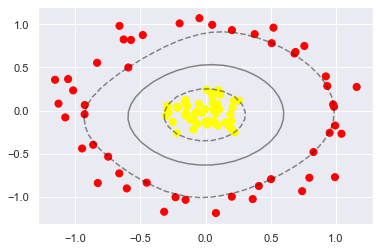

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Tuning the SVM: Softening Margins

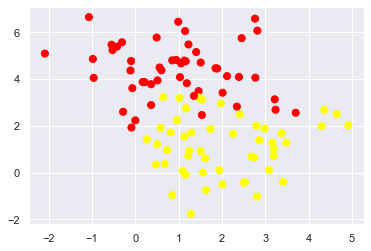

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

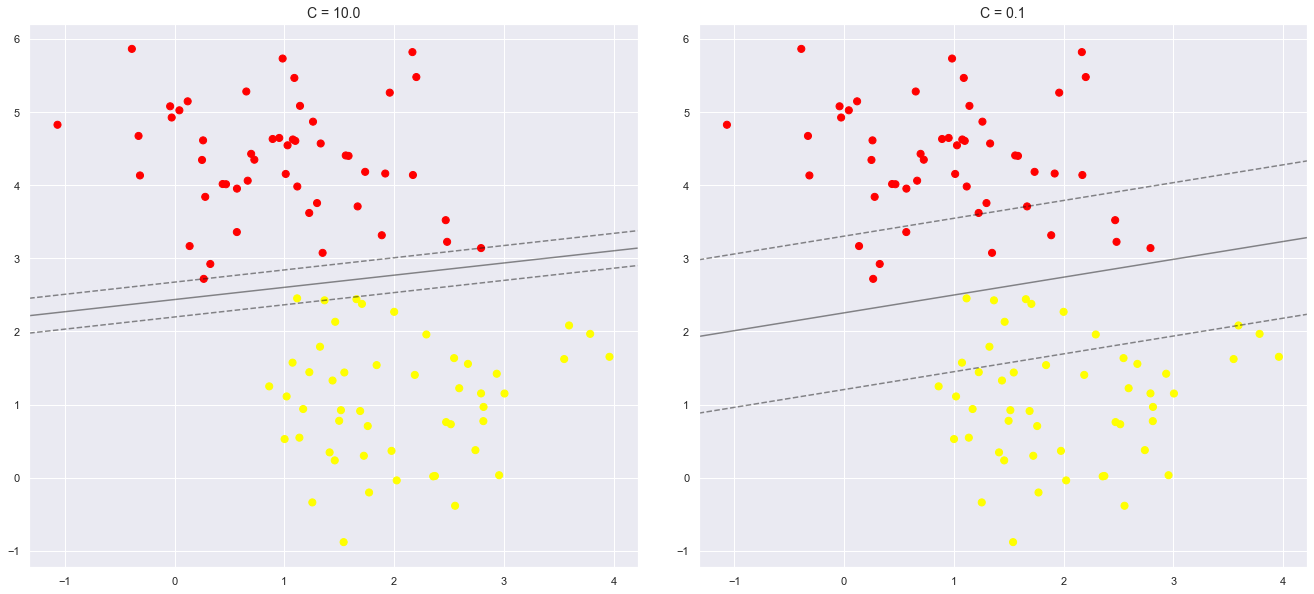

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

---

## SVM 예제
[참고자료](https://jeongmin-lee.tistory.com/87)

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
import numpy as np
from tqdm import tqdm_notebook

%matplotlib inline

#### Linear SVM

학습용 데이터로 측정한 정확도 = 0.81
시험용 데이터로 측정한 정확도 = 0.77


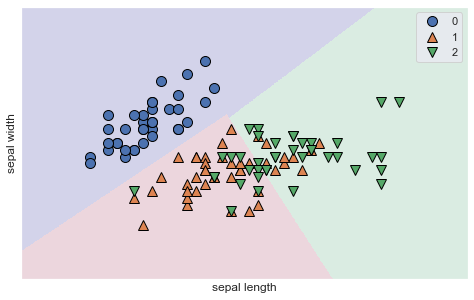

In [19]:
iris = load_iris()

# 시각화를 위해서 sepal length와 width만 사용한다.
x = iris['data'][:, [0,1]] # column 0과 1만 사용
y = iris['target']

# train 데이터 세트와 test 데이터 세트를 구성한다.
trainX, testX, trainY, testY = \
    train_test_split(x, y, test_size=0.2)

# SVM으로 Train 데이터 세트를 학습한다.
svm = SVC(kernel='linear')
svm.fit(trainX, trainY)

# 정확도를 계산한다.
print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(trainX, trainY))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(testX, testY))

# 시각화
plt.figure(figsize=(8, 5))
mglearn.plots.plot_2d_classification(svm, trainX, alpha=0.1)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

#### Non-linear SVM

In [20]:
iris = load_iris()

x = iris.data
y = iris.target

# train 데이터 세트와 test 데이터 세트를 구성한다.
trainX, testX, trainY, testY = \
    train_test_split(x, y, test_size=0.2)

# gamma와 C의 조합을 바꿔가면서 학습 데이터의 정확도가 최대인 조합을 찾는다.
optAcc = -999
optG = 0
optX =0
for gamma in tqdm_notebook(np.arange(0.1, 5.0, 0.1)):
    for c in np.arange(0.1, 5.0, 0.1):
        model = SVC(kernel='rbf', gamma=gamma, C=c)
        model.fit(trainX, trainY)
        acc = model.score(testX, testY)
        
        if acc > optAcc:
            optG = gamma
            optC = c
            optAcc = acc
            
print('optG = %.2f' % optG)
print('optC = %.2f' % optC)
print('optAcc = %.2f' % optAcc)

# 최적의 조건으로 학습한 결과를 확인한다.
model = SVC(kernel='rbf', gamma=optG, C=optC)
model.fit(testX, testY)

print()
print('학습용 데이터로 측정한 정확도 = %.2f ' % model.score(trainX, trainY))
print('시험용 데이터로 측정한 정확도 = %.2f ' % model.score(testX, testY))

C:\Users\tldus\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



optG = 0.10
optC = 2.20
optAcc = 1.00

학습용 데이터로 측정한 정확도 = 0.96 
시험용 데이터로 측정한 정확도 = 1.00 
